In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sns.set()

#from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
#from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

#from scipy.optimize import minimize
#import statsmodels.tsa.api as smt
import statsmodels.api as sm

#from tqdm import tqdm_notebook

from itertools import product

#define the mean average percentage error (MAPE), as this will be our error metric.

#def mean_absolute_percentage_error(y_true, y_pred):
    #return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
# for SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

In [ ]:
import yfinance as yf


ticker_symbol = "EUR=X"

# Define the desired date range for the historical data
start_date = "2018-06-29"
end_date = "2023-06-29"

# Download the historical data using yfinance
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Print the downloaded data
print(data)

[*********************100%***********************]  1 of 1 completed
               Open     High      Low    Close  Adj Close  Volume
Date                                                             
2018-06-29  0.86472  0.86472  0.85599  0.86483    0.86483       0
2018-07-02  0.85628  0.86262  0.85628  0.85627    0.85627       0
2018-07-03  0.85905  0.86039  0.85650  0.85895    0.85895       0
2018-07-04  0.85768  0.85974  0.85603  0.85769    0.85769       0
2018-07-05  0.85750  0.85831  0.85326  0.85746    0.85746       0
...             ...      ...      ...      ...        ...     ...
2023-06-22  0.90970  0.91315  0.90817  0.90970    0.90970       0
2023-06-23  0.91250  0.92208  0.91250  0.91250    0.91250       0
2023-06-26  0.91687  0.91843  0.91560  0.91687    0.91687       0
2023-06-27  0.91655  0.91716  0.91107  0.91655    0.91655       0
2023-06-28  0.91264  0.91746  0.91220  0.91264    0.91264       0

[1303 rows x 6 columns]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1303 entries, 2018-06-29 to 2023-06-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1303 non-null   float64
 1   High       1303 non-null   float64
 2   Low        1303 non-null   float64
 3   Close      1303 non-null   float64
 4   Adj Close  1303 non-null   float64
 5   Volume     1303 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 71.3 KB


In [ ]:
data.describe()

Open         High          Low        Close    Adj Close  Volume
count  1303.000000  1303.000000  1303.000000  1303.000000  1303.000000  1303.0
mean      0.892605     0.895423     0.889894     0.892581     0.892581     0.0
std       0.045882     0.046639     0.045098     0.045892     0.045892     0.0
min       0.810520     0.815200     0.809700     0.810300     0.810300     0.0
25%       0.856440     0.858605     0.854252     0.856407     0.856407     0.0
50%       0.888190     0.890390     0.885590     0.888180     0.888180     0.0
75%       0.917080     0.920865     0.914505     0.917055     0.917055     0.0
max       1.042080     1.048200     1.034120     1.042080     1.042080     0.0

In [ ]:
print(data.index.dtype)

datetime64[ns]


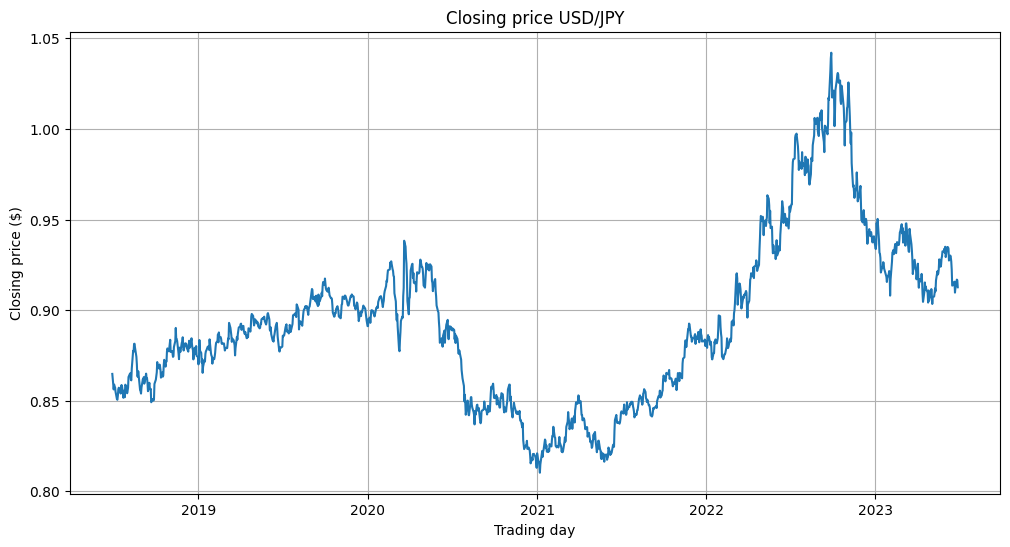

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data.Close)
plt.title('Closing price USD/JPY')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(True)
plt.show()

### ARIMA model

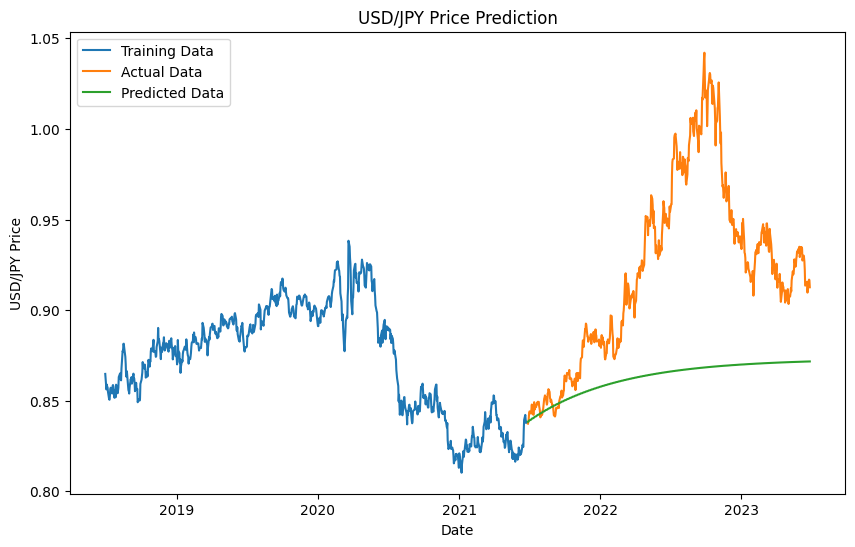

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Convert the date index to datetime
data.index = pd.to_datetime(data.index)

# Select the relevant column containing the USD/JPY price
usd_eur = data['Close']

# Split the data into training and testing sets
train = usd_eur['2018-06-28':'2021-06-27']
test = usd_eur['2021-06-28':'2023-06-28']

# Create and fit the ARIMA model
model = ARIMA(train, order=(1, 0, 0))  # Adjust the order as needed
model_fit = model.fit()

prediction_index = test.index.tolist()

# Predict the USD/JPY prices
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

# Visualize the actual and predicted prices
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Data')
plt.plot(test.index, predictions, label='Predicted Data')
plt.xlabel('Date')
plt.ylabel('USD/JPY Price')
plt.title('USD/JPY Price Prediction')
plt.legend()
plt.show()

In [ ]:
data['Close']

Date
2018-06-29    0.86483
2018-07-02    0.85627
2018-07-03    0.85895
2018-07-04    0.85769
2018-07-05    0.85746
               ...   
2023-06-22    0.90970
2023-06-23    0.91250
2023-06-26    0.91687
2023-06-27    0.91655
2023-06-28    0.91264
Name: Close, Length: 1303, dtype: float64

## SARIMA model
To enhance the model by considering seasonality, performing model diagnostics, and optimizing the parameters, we can use the SARIMA (Seasonal ARIMA) model. SARIMA incorporates both the non-seasonal and seasonal components to capture the underlying patterns in the data.

In [ ]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define a function for SARIMA model fitting and diagnostics
def fit_sarima(order, seasonal_order):
    model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    print(model_fit.summary())
    return model_fit

# Specify different combinations of parameters to evaluate
p = d = q = range(0, 2)  # Consider AR, I, and MA components in the range [0, 1]
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]  # Consider seasonal components with period 12 (months)

# Initialize variables to store best results
best_model = None
best_aic = np.inf
best_bic = np.inf
best_log_likelihood = -np.inf

# Iterate over combinations and fit SARIMA models
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model_fit = fit_sarima(param, param_seasonal)
            if model_fit.aic < best_aic and model_fit.bic < best_bic and model_fit.llf > best_log_likelihood:
                best_model = model_fit
                best_aic = model_fit.aic
                best_bic = model_fit.bic
                best_log_likelihood = model_fit.llf
        except:
            continue

# Print the best model's summary
print("Best Model Summary:")
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  780
Model:                        SARIMAX   Log Likelihood               -1001.469
Date:                Thu, 29 Jun 2023   AIC                           2004.937
Time:                        20:39:30   BIC                           2009.596
Sample:                             0   HQIC                          2006.729
                                - 780                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.7634      0.796      0.959      0.338      -0.797       2.324
Ljung-Box (L1) (Q):                 770.93   Jarque-Bera (JB):                41.51
Prob(Q):                              0.00   Pr

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  780
Model:                        SARIMAX   Log Likelihood               -1001.469
Date:                Thu, 29 Jun 2023   AIC                           2004.937
Time:                        20:41:00   BIC                           2009.596
Sample:                             0   HQIC                          2006.729
                                - 780                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.7634      0.796      0.959      0.338      -0.797       2.324
Ljung-Box (L1) (Q):                 770.93   Jarque-Bera (JB):                41.51
Prob(Q):                              0.00   Pr

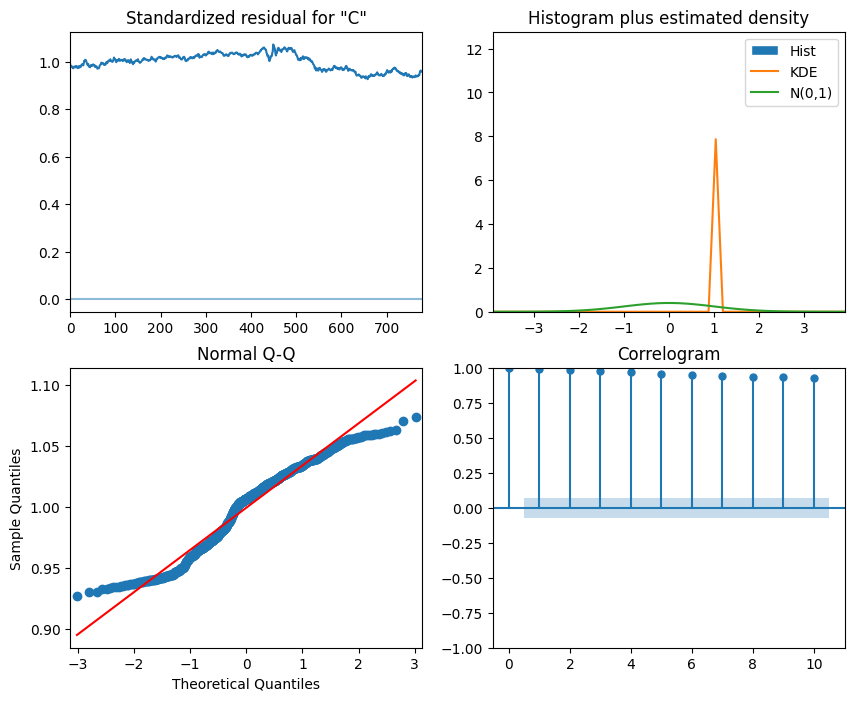

                                 SARIMAX Results                                  
Dep. Variable:                      Close   No. Observations:                  780
Model:             SARIMAX(0, 0, [1], 12)   Log Likelihood                -492.352
Date:                    Thu, 29 Jun 2023   AIC                            988.704
Time:                            20:41:02   BIC                            998.023
Sample:                                 0   HQIC                           992.288
                                    - 780                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12       0.9999     28.440      0.035      0.972     -54.742      56.742
sigma2         0.1940      5.486      0.035      0.972     -10.558      10.946
Ljung-Box (L1) (Q): 

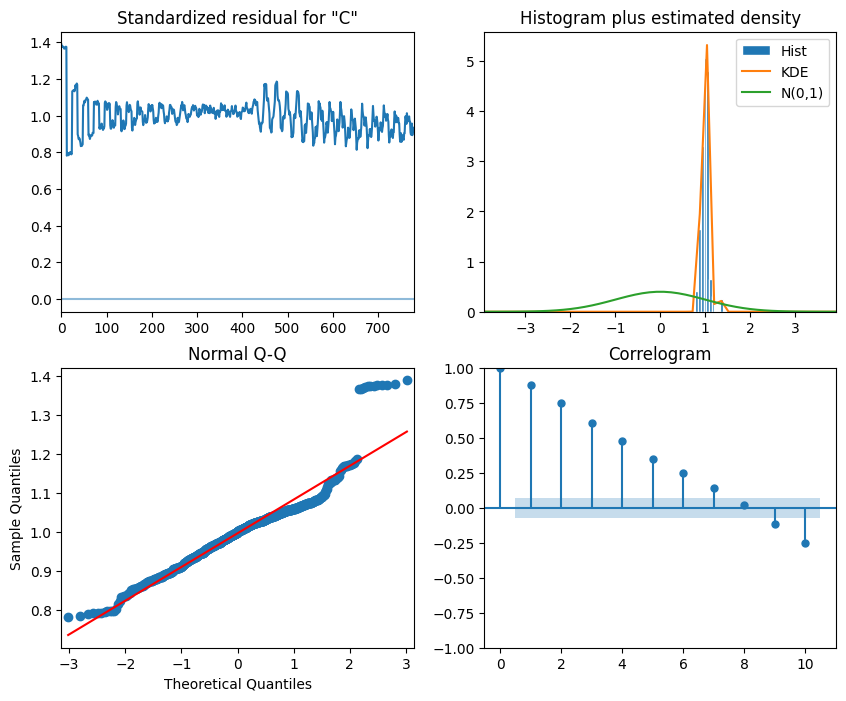

                                SARIMAX Results                                 
Dep. Variable:                    Close   No. Observations:                  780
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                2362.516
Date:                  Thu, 29 Jun 2023   AIC                          -4723.032
Time:                          20:41:03   BIC                          -4718.388
Sample:                               0   HQIC                         -4721.245
                                  - 780                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0001   4.32e-06     28.809      0.000       0.000       0.000
Ljung-Box (L1) (Q):                 625.55   Jarque-Bera (JB):               188.60
Prob(Q):                       

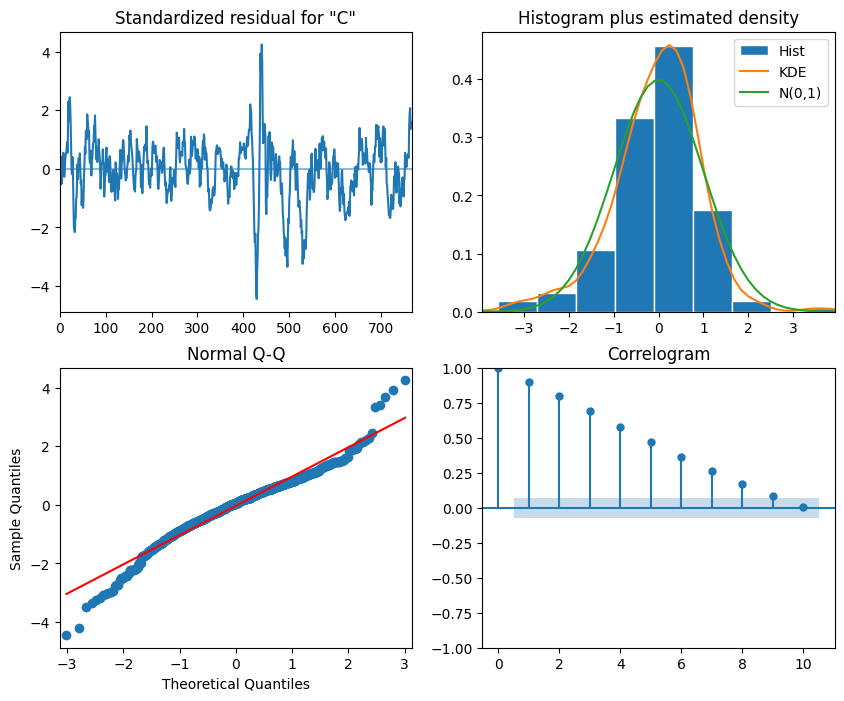

                                 SARIMAX Results                                  
Dep. Variable:                      Close   No. Observations:                  780
Model:             SARIMAX(0, 1, [1], 12)   Log Likelihood                2369.951
Date:                    Thu, 29 Jun 2023   AIC                          -4735.902
Time:                            20:41:04   BIC                          -4726.614
Sample:                                 0   HQIC                         -4732.327
                                    - 780                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.1442      0.028     -5.076      0.000      -0.200      -0.089
sigma2         0.0001   4.75e-06     25.706      0.000       0.000       0.000
Ljung-Box (L1) (Q): 

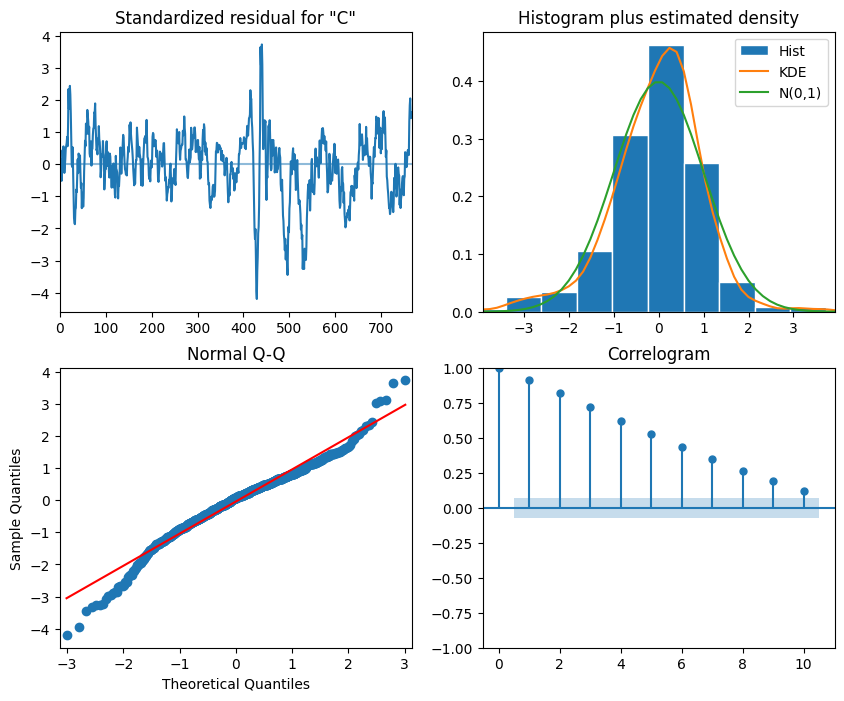

                                SARIMAX Results                                 
Dep. Variable:                    Close   No. Observations:                  780
Model:             SARIMAX(1, 0, 0, 12)   Log Likelihood                2347.233
Date:                  Thu, 29 Jun 2023   AIC                          -4690.465
Time:                          20:41:05   BIC                          -4681.147
Sample:                               0   HQIC                         -4686.881
                                  - 780                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9999      0.000   6032.255      0.000       1.000       1.000
sigma2         0.0001   4.39e-06     28.544      0.000       0.000       0.000
Ljung-Box (L1) (Q):                 

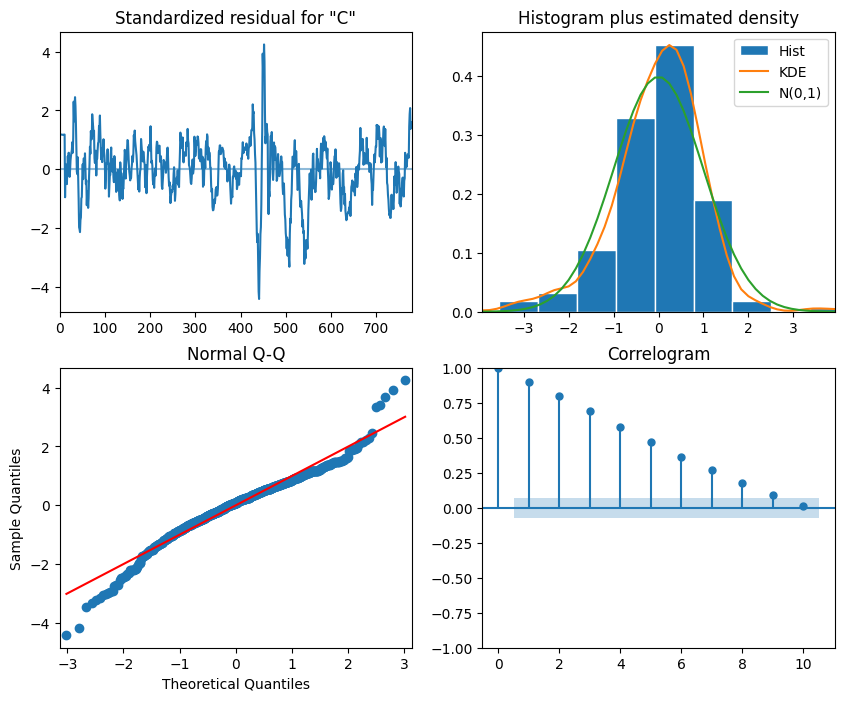

                                 SARIMAX Results                                  
Dep. Variable:                      Close   No. Observations:                  780
Model:             SARIMAX(1, 0, [1], 12)   Log Likelihood                2316.035
Date:                    Thu, 29 Jun 2023   AIC                          -4626.069
Time:                            20:41:07   BIC                          -4612.091
Sample:                                 0   HQIC                         -4620.693
                                    - 780                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9992   9.03e-05   1.11e+04      0.000       0.999       0.999
ma.S.L12      -0.0087      0.030     -0.287      0.774      -0.068       0.051
sigma2         0.000

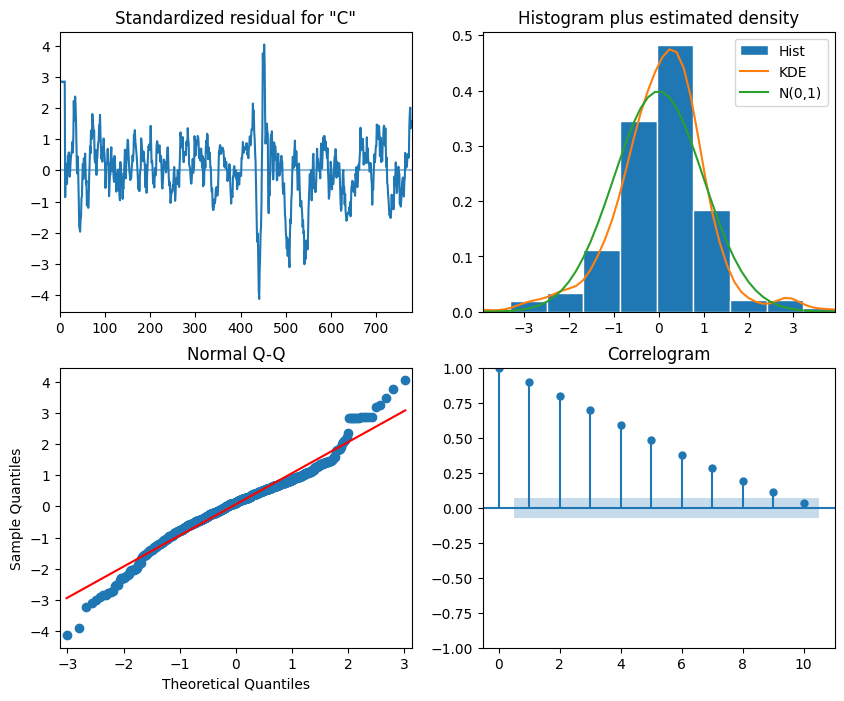

                                SARIMAX Results                                 
Dep. Variable:                    Close   No. Observations:                  780
Model:             SARIMAX(1, 1, 0, 12)   Log Likelihood                2369.392
Date:                  Thu, 29 Jun 2023   AIC                          -4734.783
Time:                          20:41:09   BIC                          -4725.496
Sample:                               0   HQIC                         -4731.209
                                  - 780                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1359      0.027     -4.988      0.000      -0.189      -0.082
sigma2         0.0001   4.76e-06     25.682      0.000       0.000       0.000
Ljung-Box (L1) (Q):                 

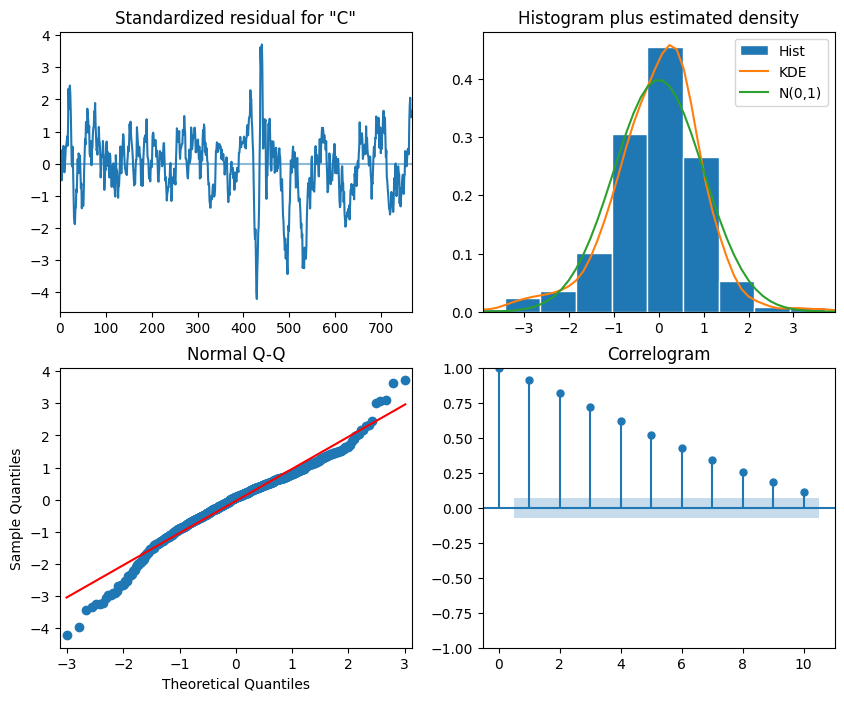

                                 SARIMAX Results                                  
Dep. Variable:                      Close   No. Observations:                  780
Model:             SARIMAX(1, 1, [1], 12)   Log Likelihood                2369.230
Date:                    Thu, 29 Jun 2023   AIC                          -4732.460
Time:                            20:41:11   BIC                          -4718.529
Sample:                                 0   HQIC                         -4727.098
                                    - 780                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1129      0.365     -0.310      0.757      -0.828       0.602
ma.S.L12      -0.0005      0.375     -0.001      0.999      -0.736       0.735
sigma2         0.000

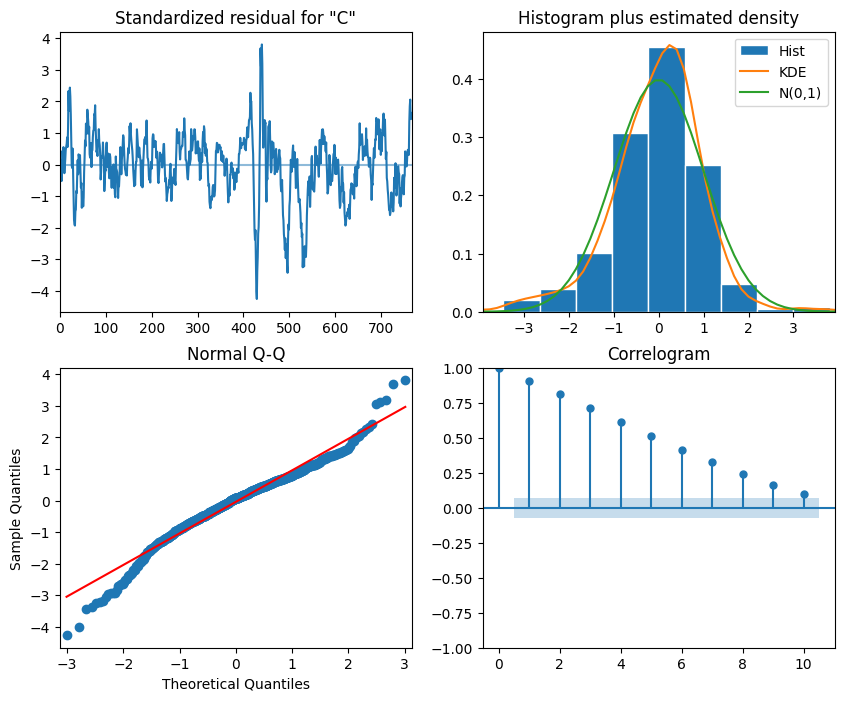

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  780
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -464.839
Date:                Thu, 29 Jun 2023   AIC                            933.678
Time:                        20:41:12   BIC                            942.996
Sample:                             0   HQIC                           937.262
                                - 780                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9999      1.148      0.871      0.384      -1.251       3.250
sigma2         0.1912      0.241      0.795      0.427      -0.280       0.663
Ljung-Box (L1) (Q):                  26.94   Jarque-

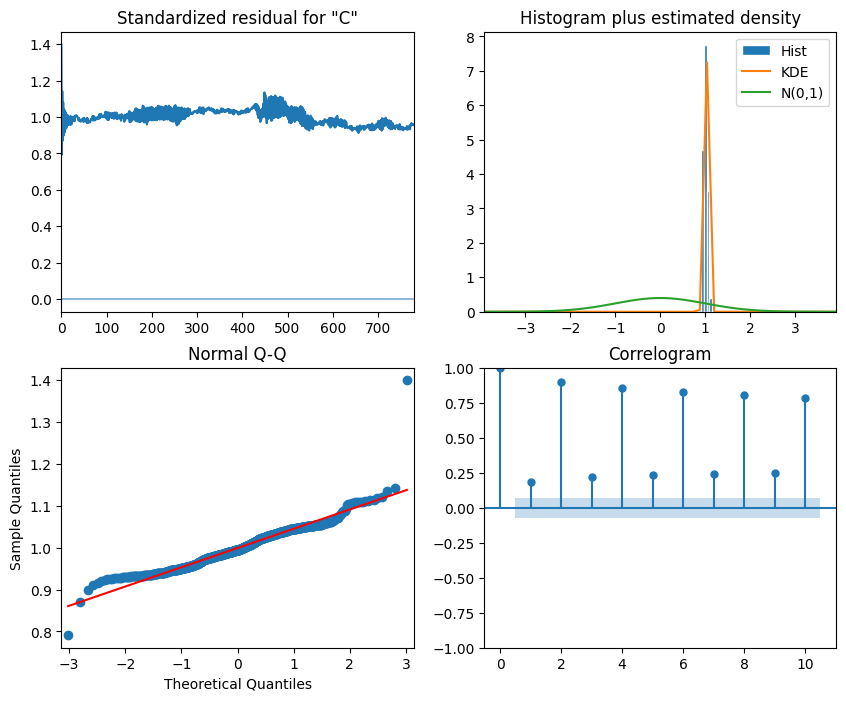

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  780
Model:             SARIMAX(0, 0, 1)x(0, 0, 1, 12)   Log Likelihood                  44.030
Date:                            Thu, 29 Jun 2023   AIC                            -82.061
Time:                                    20:41:14   BIC                            -68.083
Sample:                                         0   HQIC                           -76.684
                                            - 780                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.0000      2.007      0.498      0.618      -2.934       4.934
ma.S.L12       1.0000     30.791   

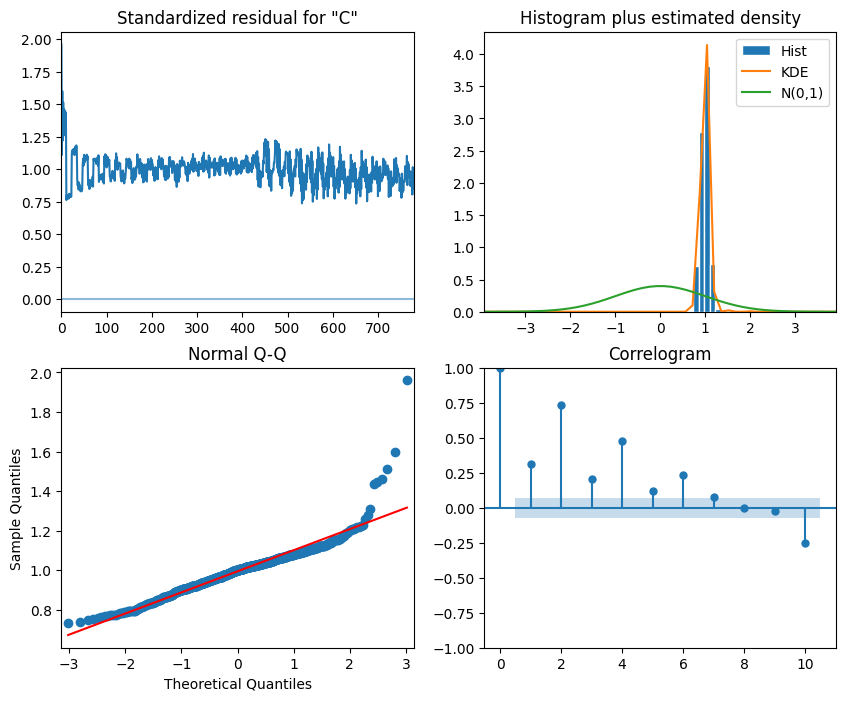

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                  780
Model:             SARIMAX(0, 0, 1)x(0, 1, [], 12)   Log Likelihood                2661.450
Date:                             Thu, 29 Jun 2023   AIC                          -5318.899
Time:                                     20:41:16   BIC                          -5309.611
Sample:                                          0   HQIC                         -5315.324
                                             - 780                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9740      0.005    201.187      0.000       0.964       0.983
sigma2      5.691e-05   2.2

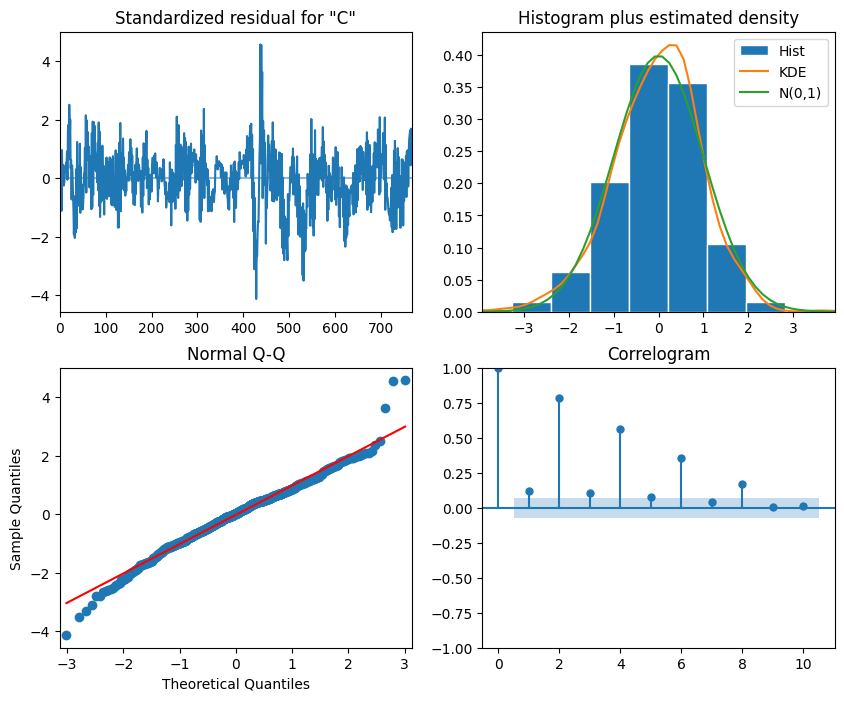

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  780
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood                2667.758
Date:                            Thu, 29 Jun 2023   AIC                          -5329.516
Time:                                    20:41:18   BIC                          -5315.584
Sample:                                         0   HQIC                         -5324.153
                                            - 780                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9740      0.005    200.003      0.000       0.964       0.984
ma.S.L12      -0.1115      0.036   

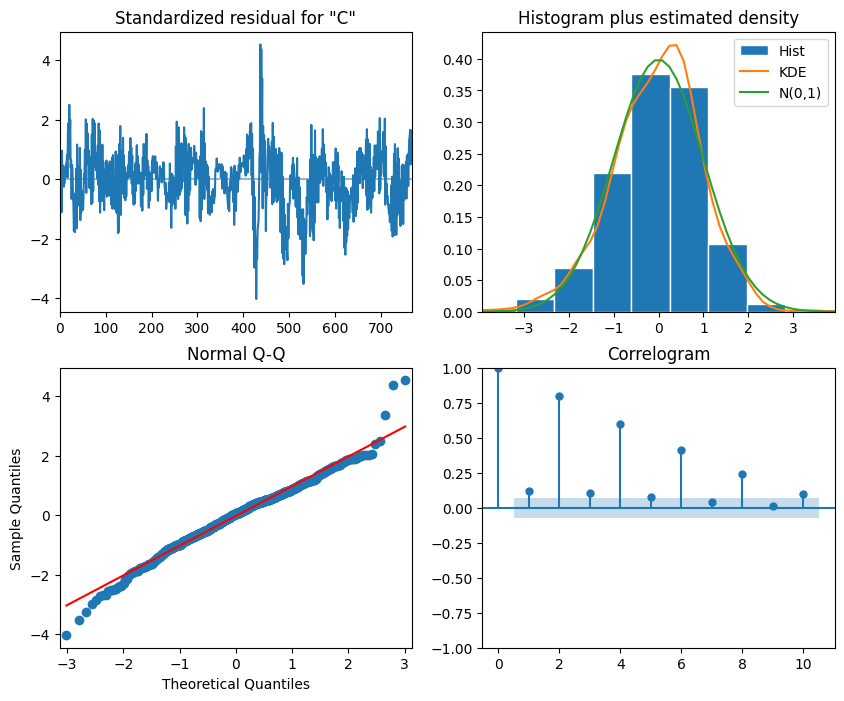

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                  780
Model:             SARIMAX(0, 0, 1)x(1, 0, [], 12)   Log Likelihood                2682.202
Date:                             Thu, 29 Jun 2023   AIC                          -5358.404
Time:                                     20:41:20   BIC                          -5344.426
Sample:                                          0   HQIC                         -5353.028
                                             - 780                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.8395      0.018     45.924      0.000       0.804       0.875
ar.S.L12       0.9995   8.4

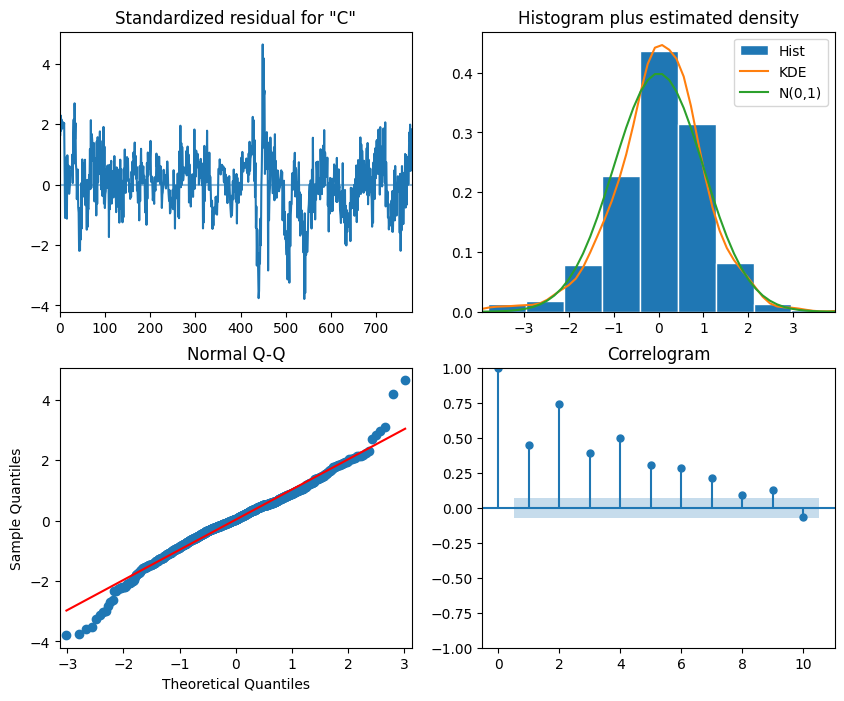

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  780
Model:             SARIMAX(0, 0, 1)x(1, 0, 1, 12)   Log Likelihood                2701.120
Date:                            Thu, 29 Jun 2023   AIC                          -5394.241
Time:                                    20:41:24   BIC                          -5375.604
Sample:                                         0   HQIC                         -5387.073
                                            - 780                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.8881      0.015     57.926      0.000       0.858       0.918
ar.S.L12       0.9998   6.36e-05   

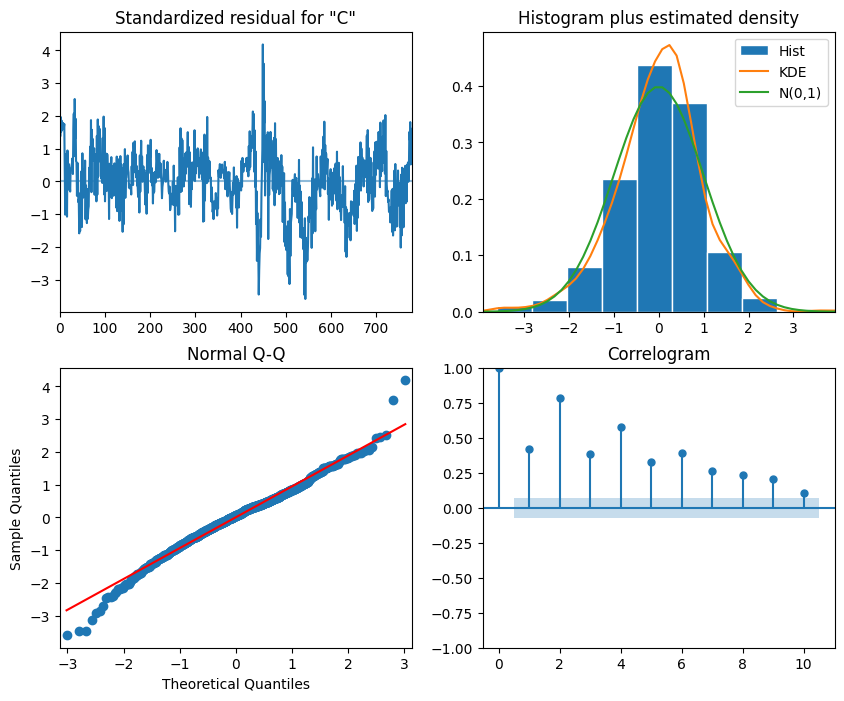

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                  780
Model:             SARIMAX(0, 0, 1)x(1, 1, [], 12)   Log Likelihood                2667.803
Date:                             Thu, 29 Jun 2023   AIC                          -5329.607
Time:                                     20:41:26   BIC                          -5315.676
Sample:                                          0   HQIC                         -5324.245
                                             - 780                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9740      0.005    206.976      0.000       0.965       0.983
ar.S.L12      -0.1358      

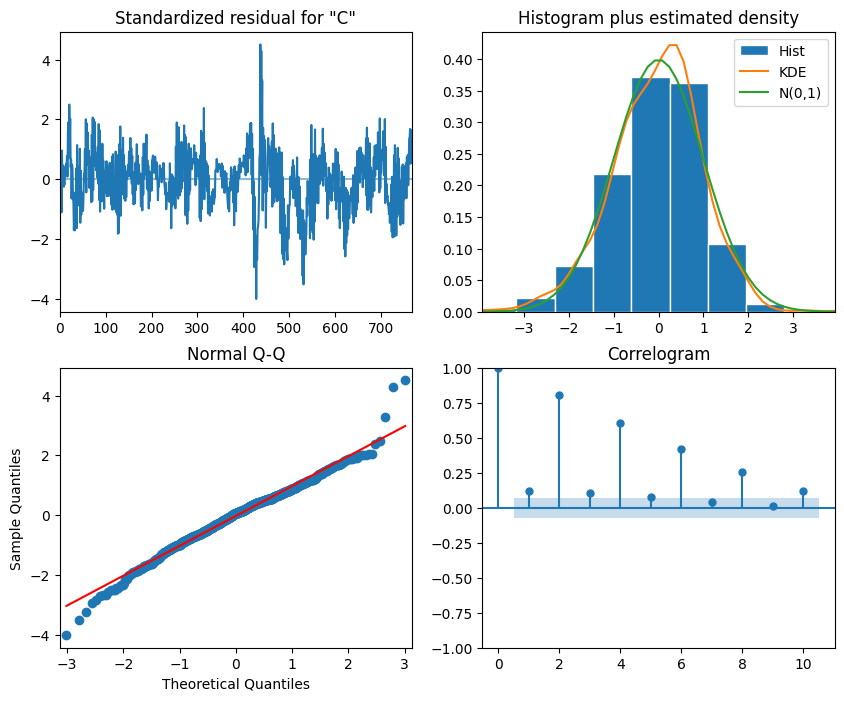

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  780
Model:             SARIMAX(0, 0, 1)x(1, 1, 1, 12)   Log Likelihood                2667.945
Date:                            Thu, 29 Jun 2023   AIC                          -5327.890
Time:                                    20:41:30   BIC                          -5309.315
Sample:                                         0   HQIC                         -5320.741
                                            - 780                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9739      0.005    192.648      0.000       0.964       0.984
ar.S.L12      -0.1248      0.283   

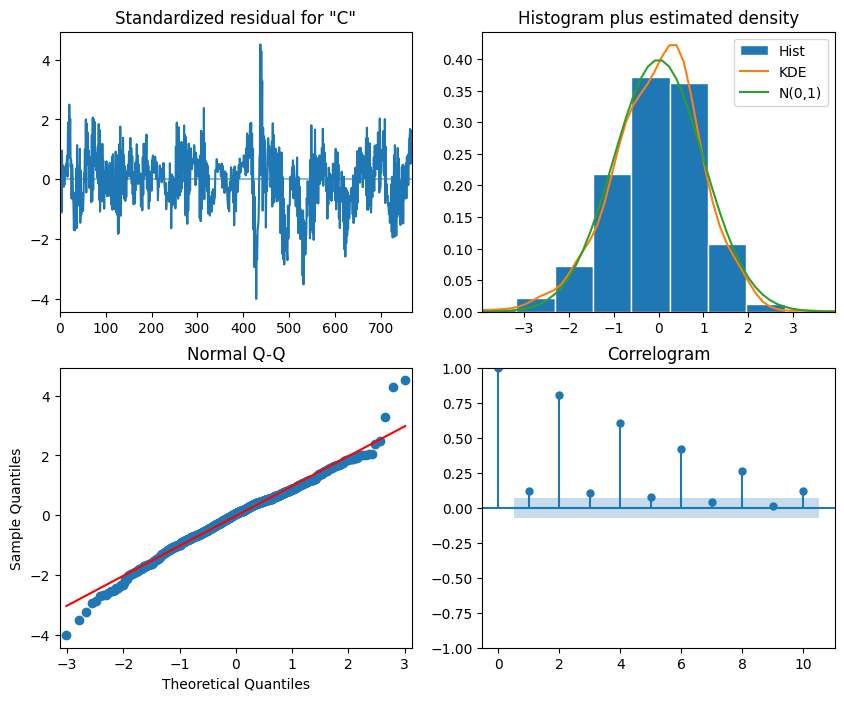

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  780
Model:               SARIMAX(0, 1, 0)   Log Likelihood                3294.801
Date:                Thu, 29 Jun 2023   AIC                          -6587.601
Time:                        20:41:31   BIC                          -6582.943
Sample:                             0   HQIC                         -6585.810
                                - 780                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       1.24e-05   3.64e-07     34.095      0.000    1.17e-05    1.31e-05
Ljung-Box (L1) (Q):                   1.65   Jarque-Bera (JB):               533.52
Prob(Q):                              0.20   Pr

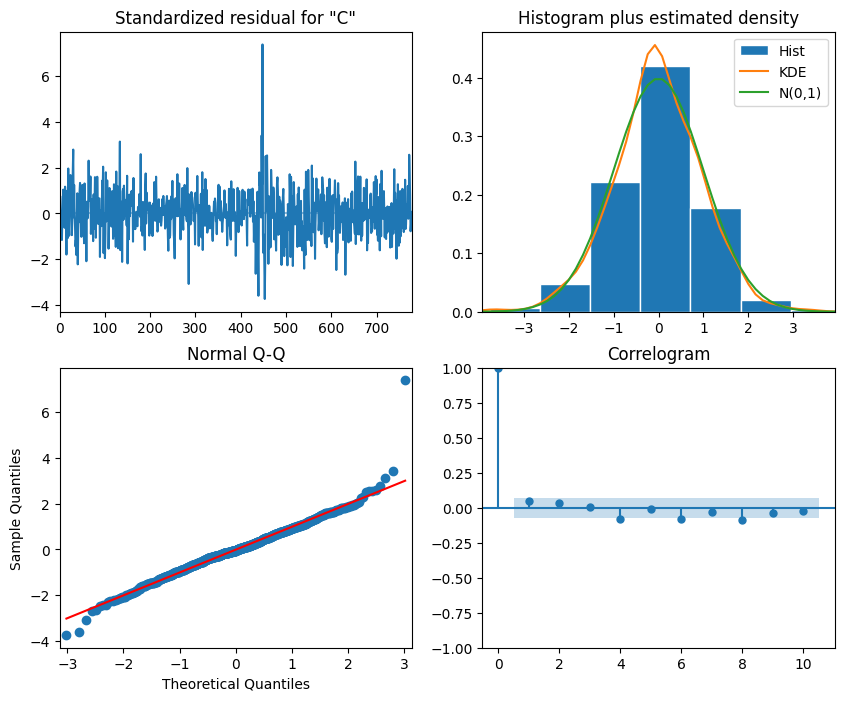

                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  780
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 12)   Log Likelihood                3295.019
Date:                              Thu, 29 Jun 2023   AIC                          -6586.037
Time:                                      20:41:32   BIC                          -6576.721
Sample:                                           0   HQIC                         -6582.454
                                              - 780                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12       0.0297      0.036      0.818      0.413      -0.041       0.101
sigma2      1.238e-

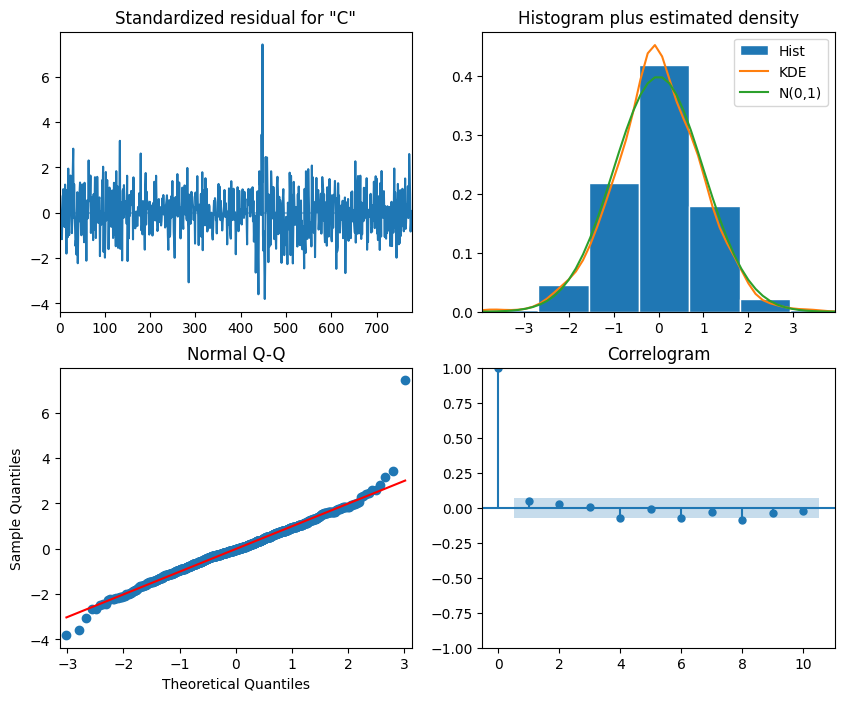

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  780
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                2987.649
Date:                            Thu, 29 Jun 2023   AIC                          -5973.298
Time:                                    20:41:33   BIC                          -5968.656
Sample:                                         0   HQIC                         -5971.511
                                            - 780                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.421e-05   8.36e-07     28.959      0.000    2.26e-05    2.59e-05
Ljung-Box (L1) (Q):                

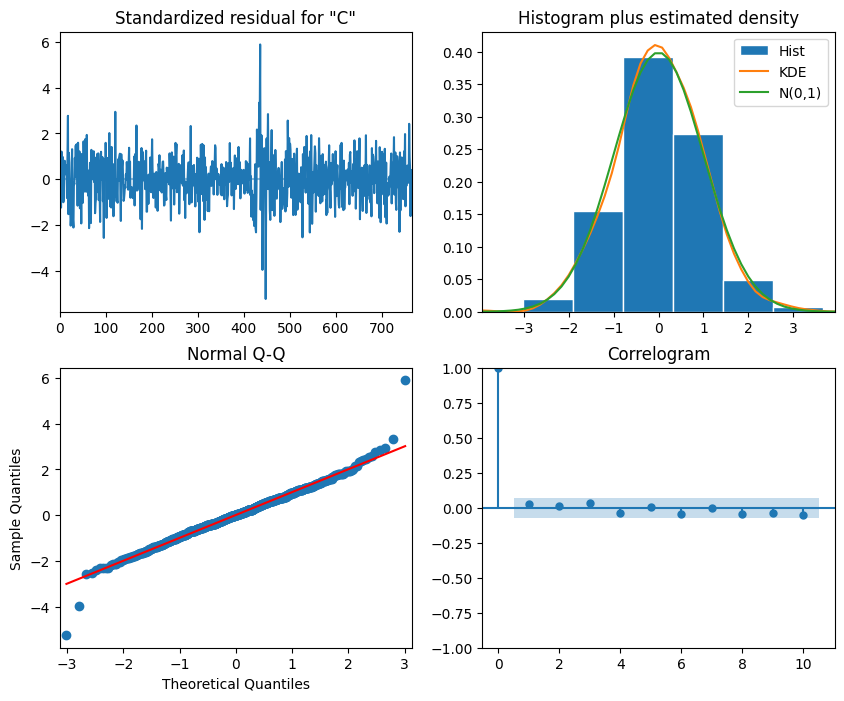

                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  780
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                3218.133
Date:                              Thu, 29 Jun 2023   AIC                          -6432.266
Time:                                      20:41:37   BIC                          -6422.981
Sample:                                           0   HQIC                         -6428.692
                                              - 780                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.9866      0.037    -26.739      0.000      -1.059      -0.914
sigma2      1.256e-

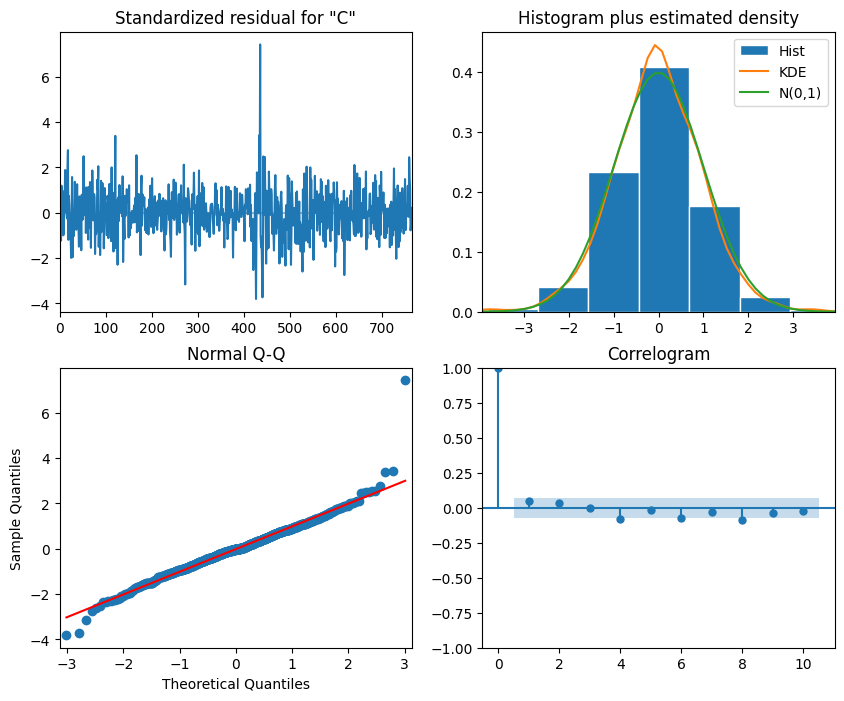

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  780
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood                3295.042
Date:                            Thu, 29 Jun 2023   AIC                          -6586.084
Time:                                    20:41:39   BIC                          -6576.768
Sample:                                         0   HQIC                         -6582.501
                                            - 780                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0251      0.036      0.689      0.491      -0.046       0.097
sigma2       1.24e-05   3.69e-07   

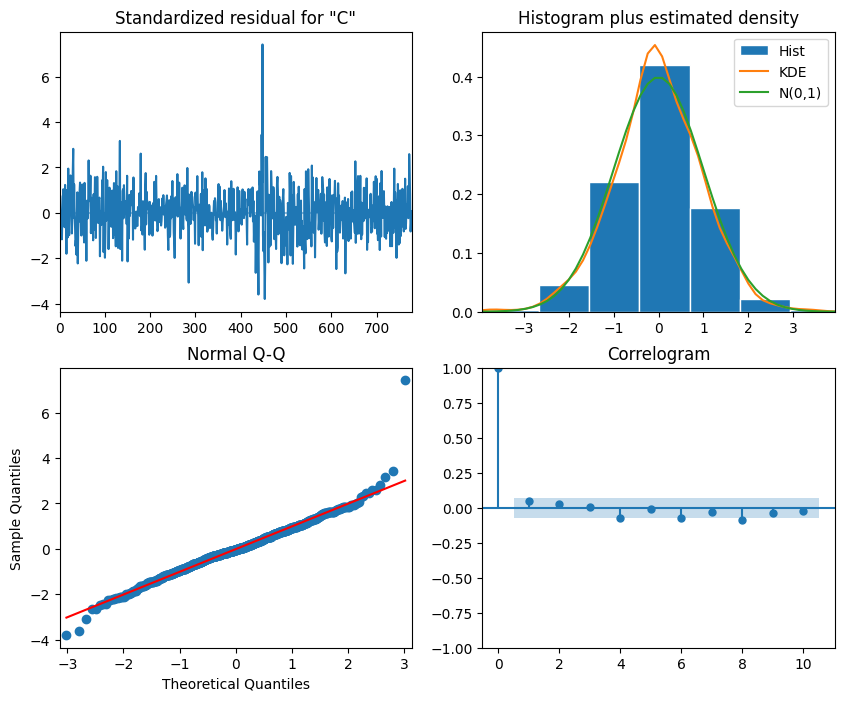

                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  780
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                3295.057
Date:                              Thu, 29 Jun 2023   AIC                          -6584.114
Time:                                      20:41:40   BIC                          -6570.140
Sample:                                           0   HQIC                         -6578.739
                                              - 780                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0754      1.215      0.062      0.951      -2.305       2.456
ma.S.L12      -0.04

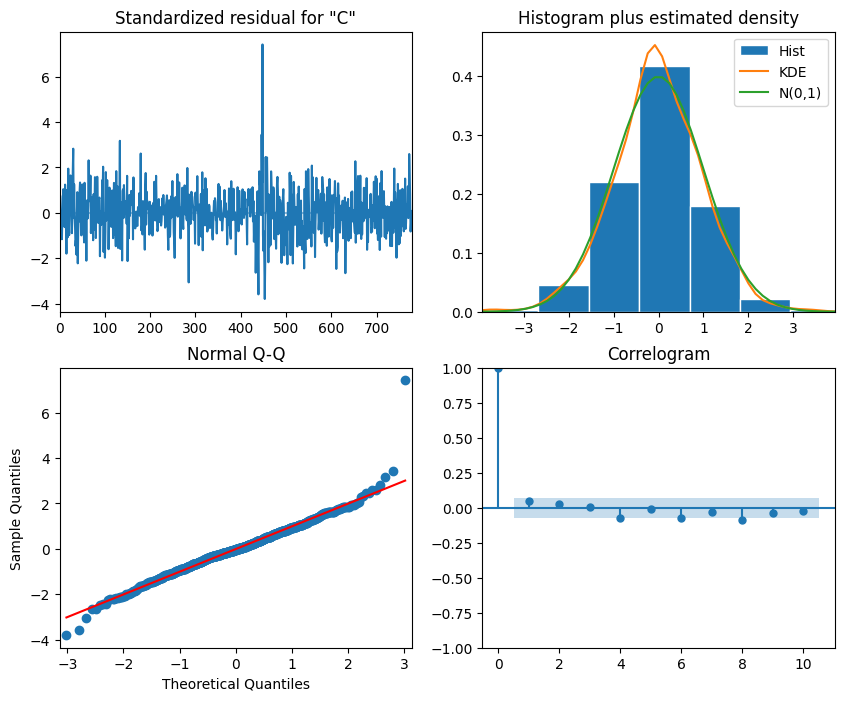

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  780
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood                3094.545
Date:                            Thu, 29 Jun 2023   AIC                          -6185.090
Time:                                    20:41:42   BIC                          -6175.805
Sample:                                         0   HQIC                         -6181.516
                                            - 780                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.4951      0.026    -19.169      0.000      -0.546      -0.445
sigma2       1.82e-05    6.6e-07   

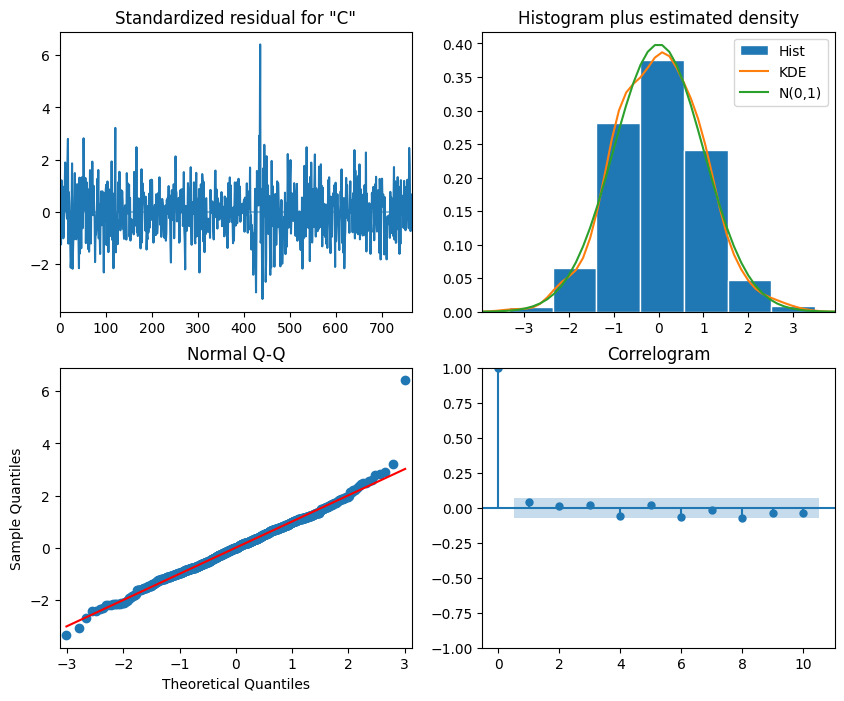

                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  780
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                3218.377
Date:                              Thu, 29 Jun 2023   AIC                          -6430.755
Time:                                      20:41:46   BIC                          -6416.827
Sample:                                           0   HQIC                         -6425.394
                                              - 780                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0322      0.038      0.857      0.391      -0.041       0.106
ma.S.L12      -0.98

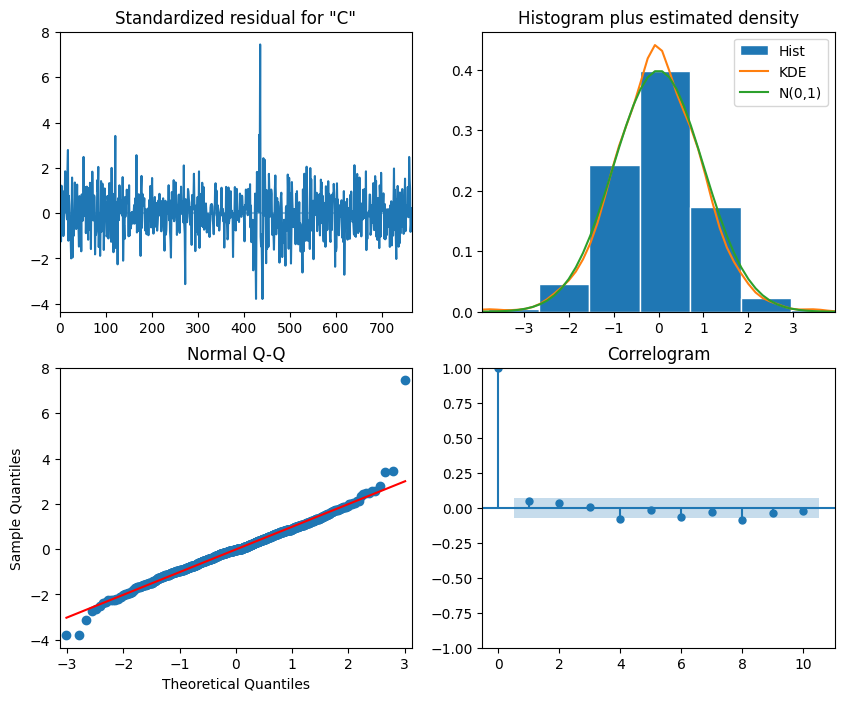

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  780
Model:               SARIMAX(0, 1, 1)   Log Likelihood                3295.576
Date:                Thu, 29 Jun 2023   AIC                          -6587.152
Time:                        20:41:47   BIC                          -6577.836
Sample:                             0   HQIC                         -6583.569
                                - 780                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0478      0.034      1.418      0.156      -0.018       0.114
sigma2      1.235e-05   3.78e-07     32.715      0.000    1.16e-05    1.31e-05
Ljung-Box (L1) (Q):                   0.01   Jarque-

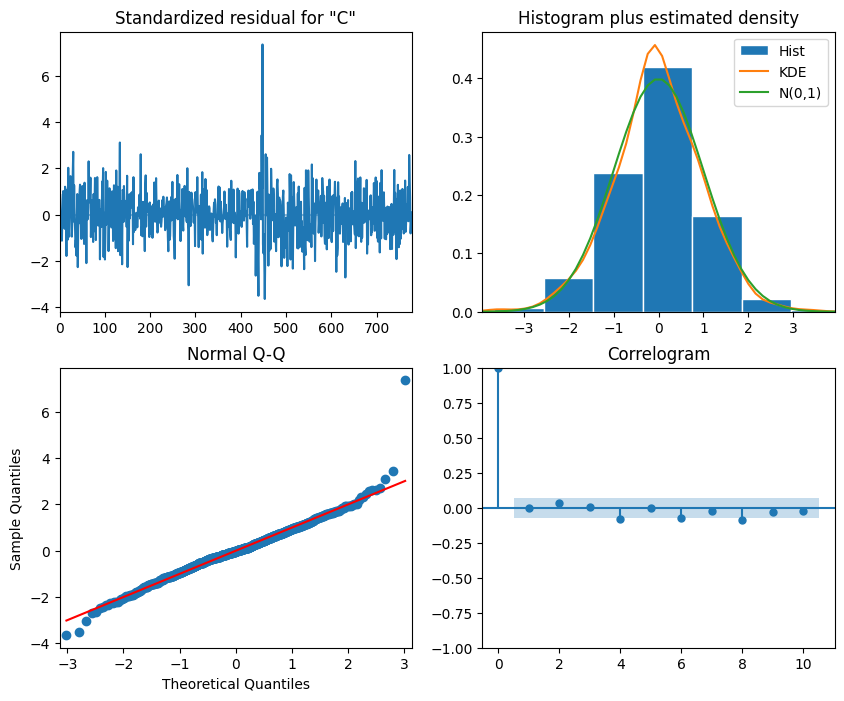

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  780
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 12)   Log Likelihood                3295.765
Date:                            Thu, 29 Jun 2023   AIC                          -6585.530
Time:                                    20:41:51   BIC                          -6571.556
Sample:                                         0   HQIC                         -6580.155
                                            - 780                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0478      0.034      1.415      0.157      -0.018       0.114
ma.S.L12       0.0297      0.037   

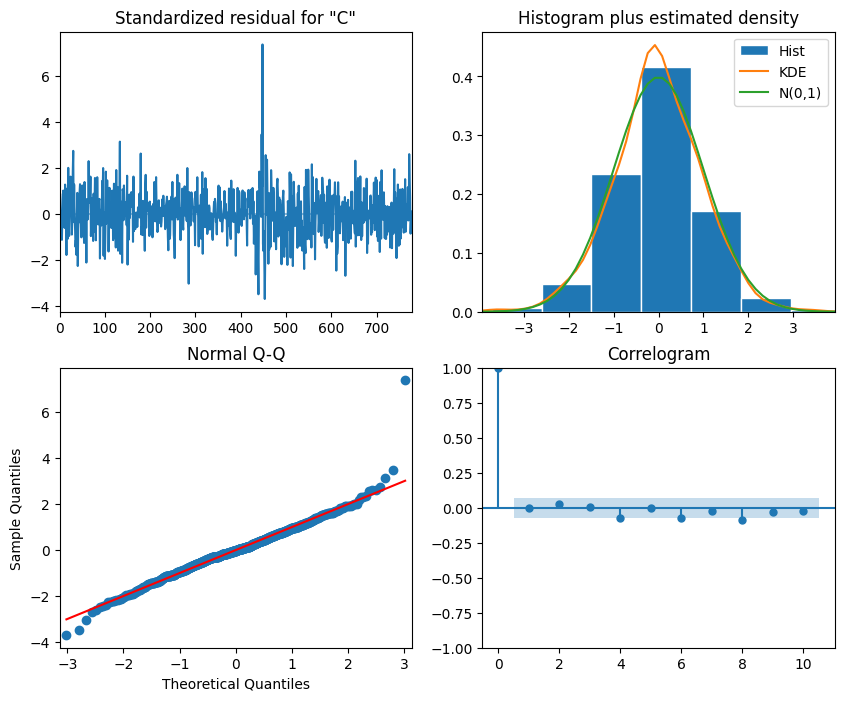

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                  780
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                2987.971
Date:                             Thu, 29 Jun 2023   AIC                          -5971.941
Time:                                     20:41:53   BIC                          -5962.656
Sample:                                          0   HQIC                         -5968.367
                                             - 780                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0302      0.033      0.913      0.361      -0.035       0.095
sigma2      2.418e-05   9.0

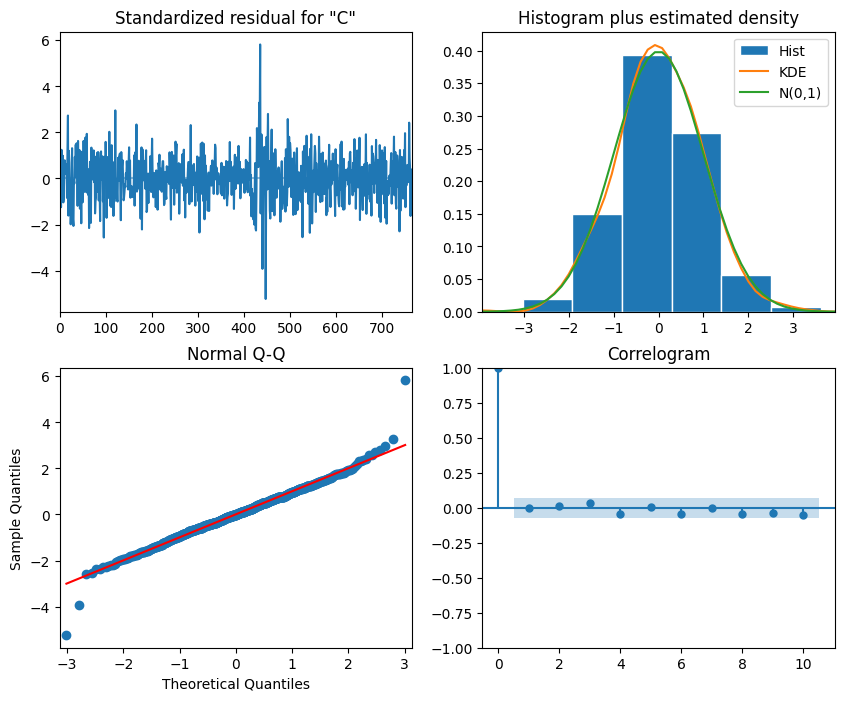

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  780
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                3180.939
Date:                            Thu, 29 Jun 2023   AIC                          -6355.877
Time:                                    20:41:55   BIC                          -6341.950
Sample:                                         0   HQIC                         -6350.516
                                            - 780                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0302      0.034      0.881      0.378      -0.037       0.097
ma.S.L12      -0.7147      0.033   

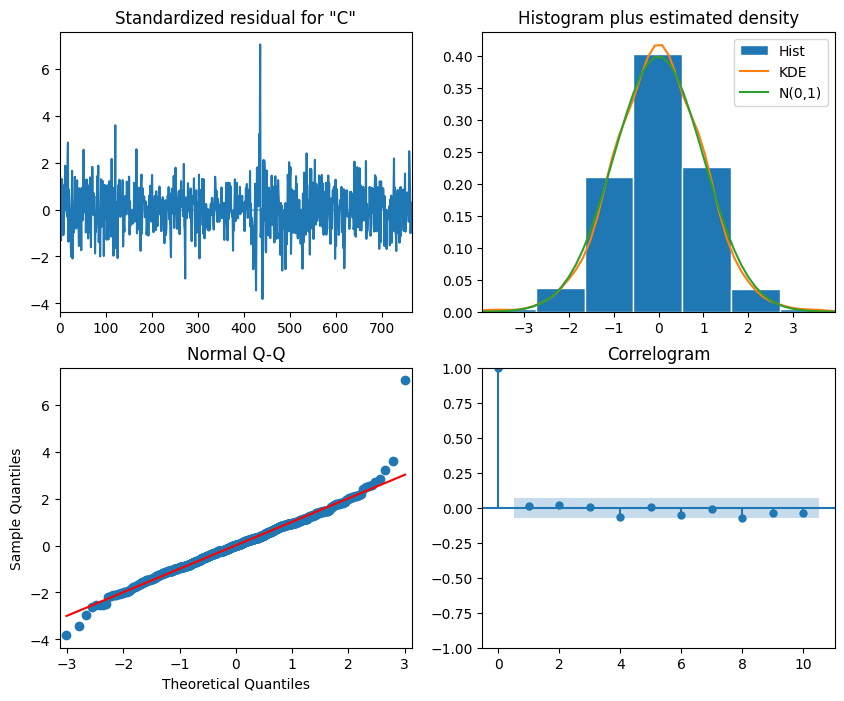

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                  780
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 12)   Log Likelihood                3295.792
Date:                             Thu, 29 Jun 2023   AIC                          -6585.584
Time:                                     20:41:57   BIC                          -6571.610
Sample:                                          0   HQIC                         -6580.209
                                             - 780                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0478      0.034      1.415      0.157      -0.018       0.114
ar.S.L12       0.0251      

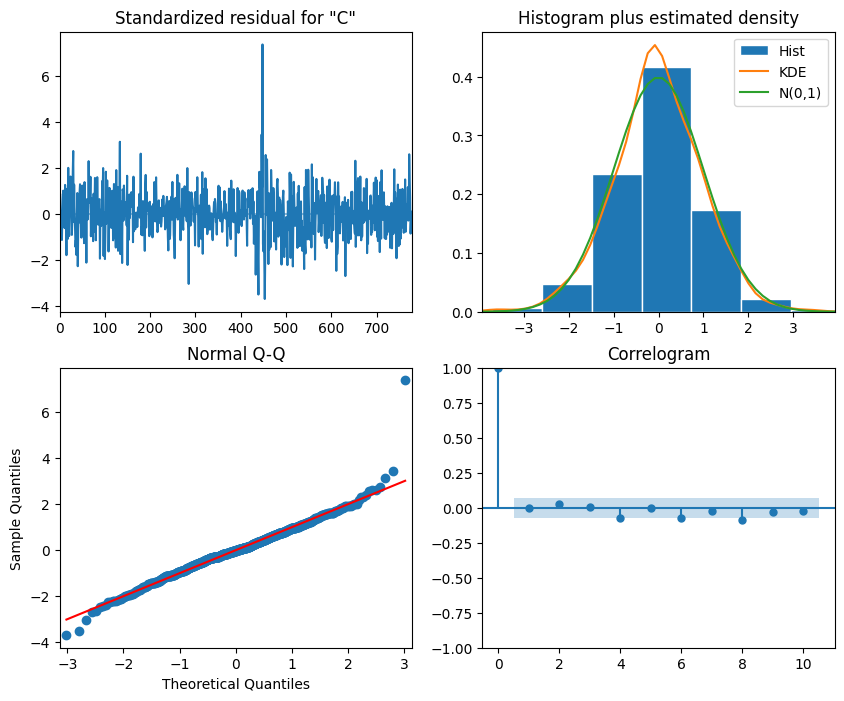

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  780
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                3295.804
Date:                            Thu, 29 Jun 2023   AIC                          -6583.607
Time:                                    20:41:59   BIC                          -6564.975
Sample:                                         0   HQIC                         -6576.441
                                            - 780                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0478      0.034      1.415      0.157      -0.018       0.114
ar.S.L12       0.0754      1.219   

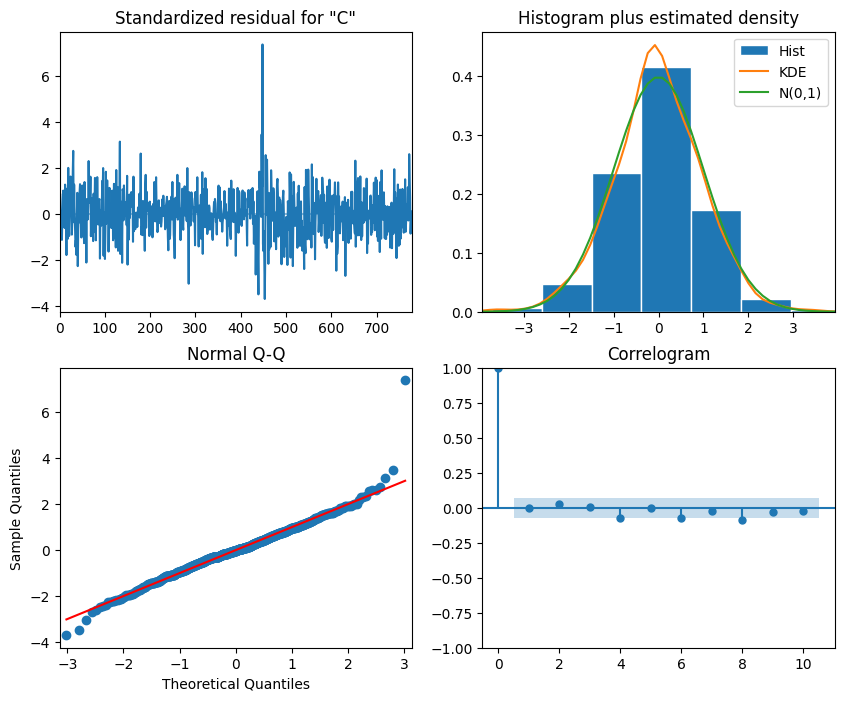

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                  780
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                3095.127
Date:                             Thu, 29 Jun 2023   AIC                          -6184.254
Time:                                     20:42:02   BIC                          -6170.327
Sample:                                          0   HQIC                         -6178.893
                                             - 780                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0302      0.034      0.892      0.372      -0.036       0.096
ar.S.L12      -0.4951      

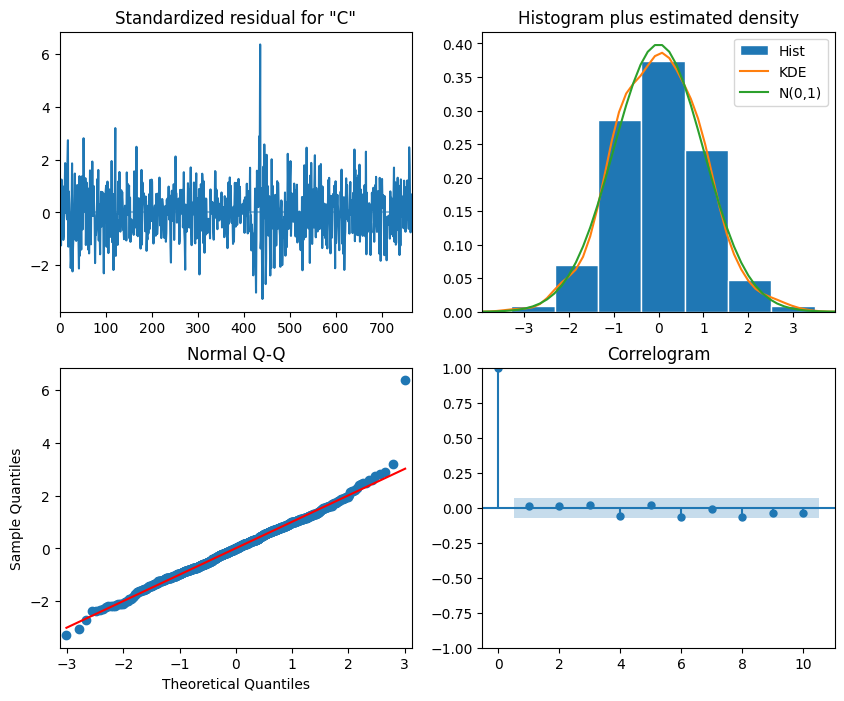

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  780
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                3179.006
Date:                            Thu, 29 Jun 2023   AIC                          -6350.011
Time:                                    20:42:06   BIC                          -6331.441
Sample:                                         0   HQIC                         -6342.863
                                            - 780                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0479      0.035      1.384      0.166      -0.020       0.116
ar.S.L12      -0.2160      0.046   

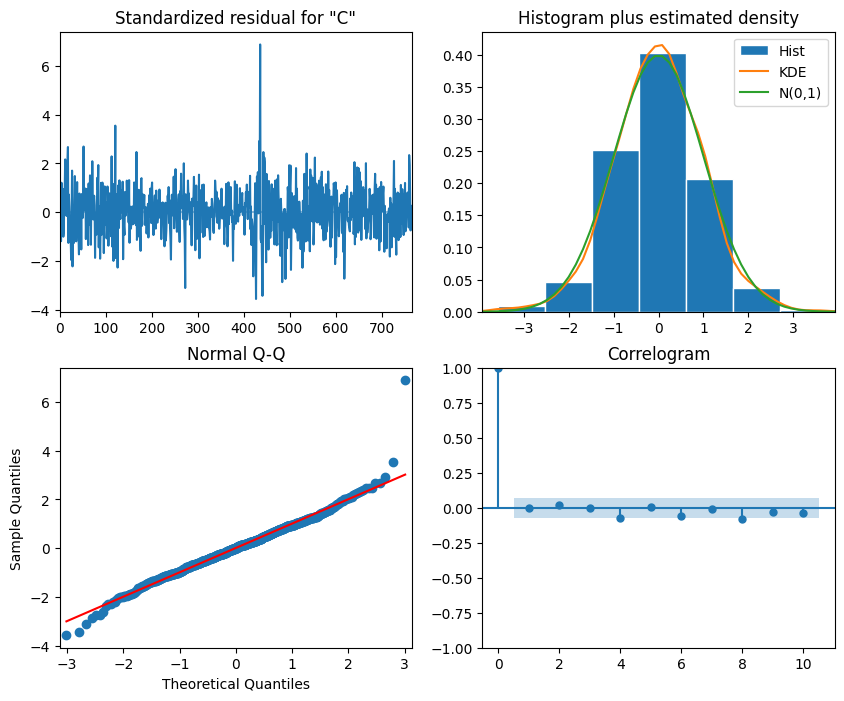

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  780
Model:               SARIMAX(1, 0, 0)   Log Likelihood                3292.156
Date:                Thu, 29 Jun 2023   AIC                          -6580.312
Time:                        20:42:07   BIC                          -6570.993
Sample:                             0   HQIC                         -6576.728
                                - 780                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   2.02e-05   4.95e+04      0.000       1.000       1.000
sigma2      1.246e-05   3.67e-07     33.909      0.000    1.17e-05    1.32e-05
Ljung-Box (L1) (Q):                   1.15   Jarque-

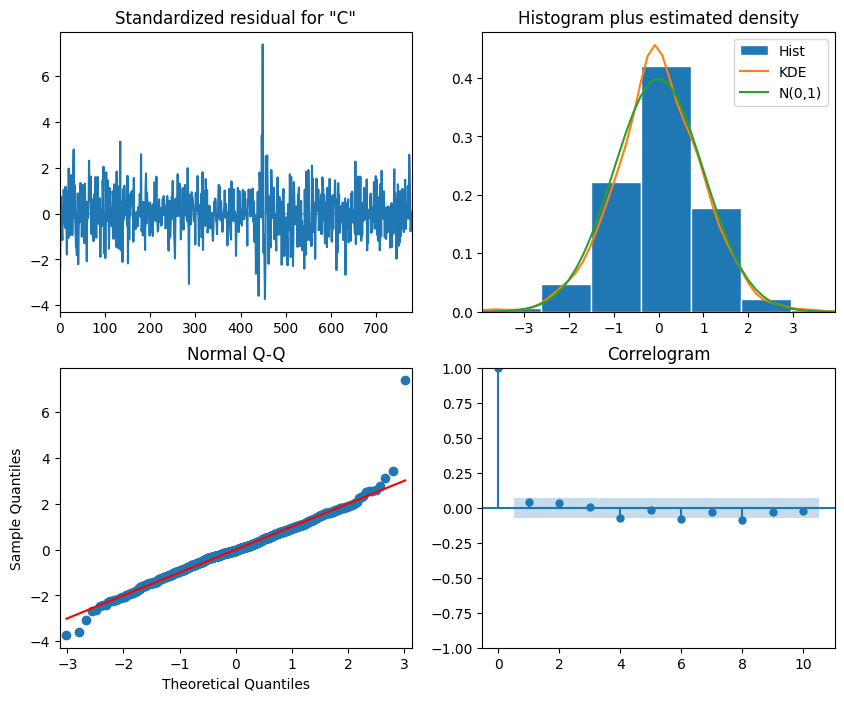

                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  780
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood                3292.156
Date:                              Thu, 29 Jun 2023   AIC                          -6578.312
Time:                                      20:42:08   BIC                          -6564.334
Sample:                                           0   HQIC                         -6572.936
                                              - 780                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   2.05e-05   4.89e+04      0.000       1.000       1.000
ma.S.L12    2.549e-

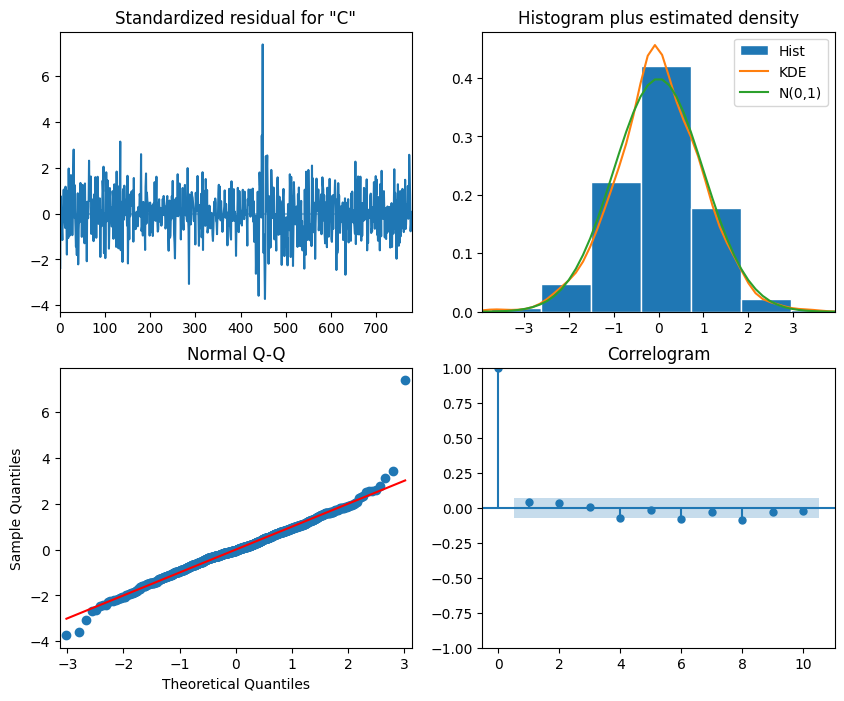

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  780
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                3009.548
Date:                            Thu, 29 Jun 2023   AIC                          -6015.096
Time:                                    20:42:09   BIC                          -6005.809
Sample:                                         0   HQIC                         -6011.521
                                            - 780                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9035      0.013     71.357      0.000       0.879       0.928
sigma2      2.306e-05   7.68e-07   

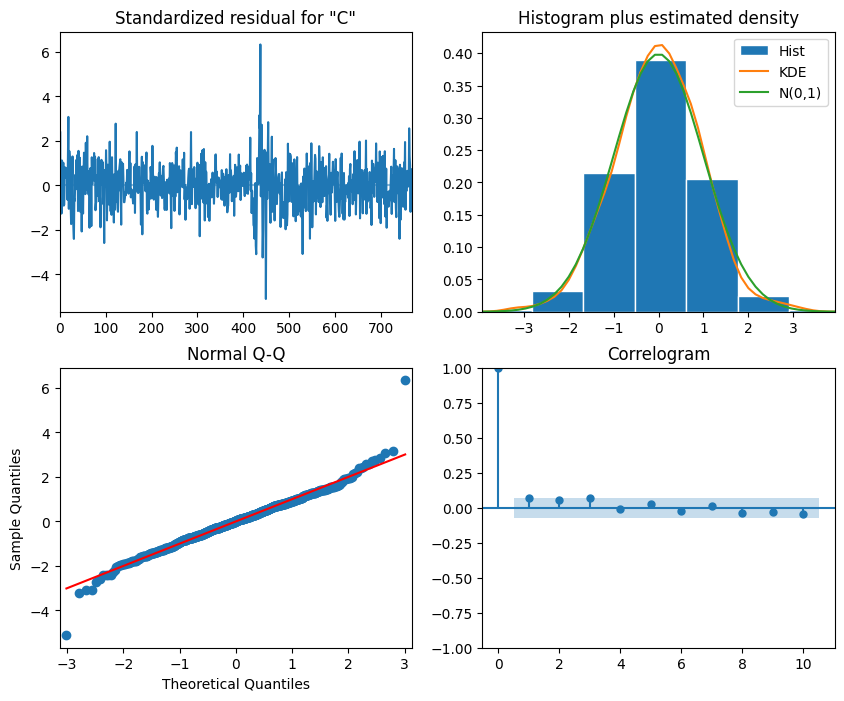

                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  780
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                3172.859
Date:                              Thu, 29 Jun 2023   AIC                          -6339.718
Time:                                      20:42:11   BIC                          -6325.787
Sample:                                           0   HQIC                         -6334.356
                                              - 780                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9046      0.010     89.250      0.000       0.885       0.924
ma.S.L12      -0.74

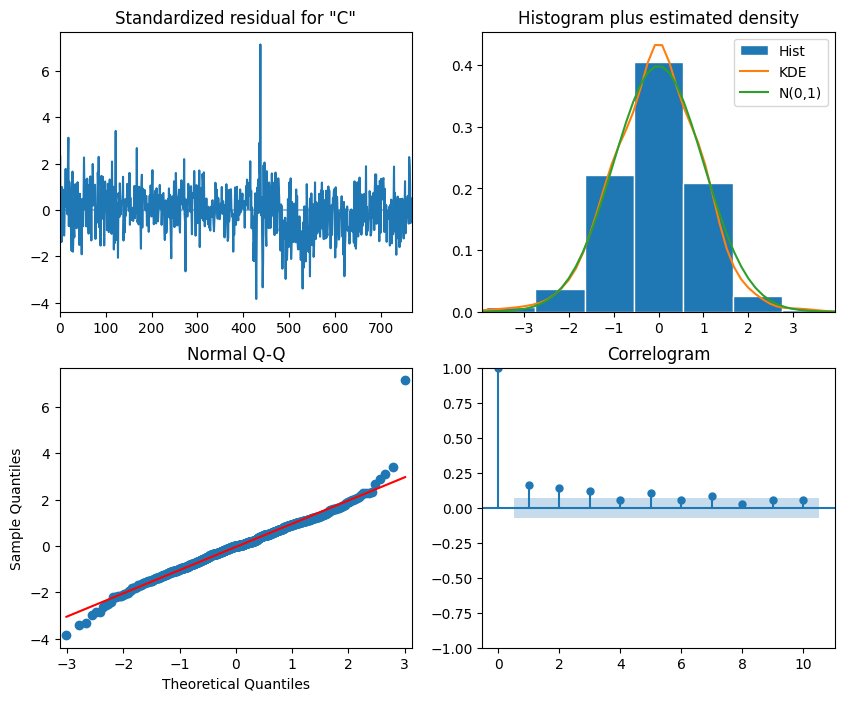

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  780
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                2992.039
Date:                            Thu, 29 Jun 2023   AIC                          -5978.077
Time:                                    20:42:13   BIC                          -5964.099
Sample:                                         0   HQIC                         -5972.701
                                            - 780                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   6.77e-05   1.48e+04      0.000       1.000       1.000
ar.S.L12       0.9995      0.000   

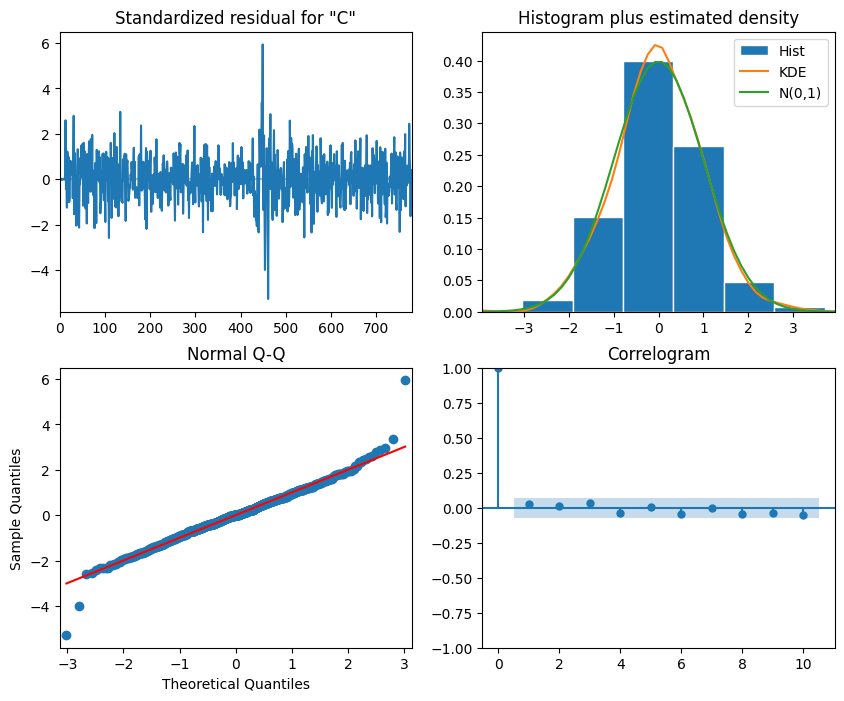

                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  780
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                3293.422
Date:                              Thu, 29 Jun 2023   AIC                          -6578.845
Time:                                      20:42:17   BIC                          -6560.208
Sample:                                           0   HQIC                         -6571.677
                                              - 780                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   2437.047      0.000       0.999       1.001
ar.S.L12       0.99

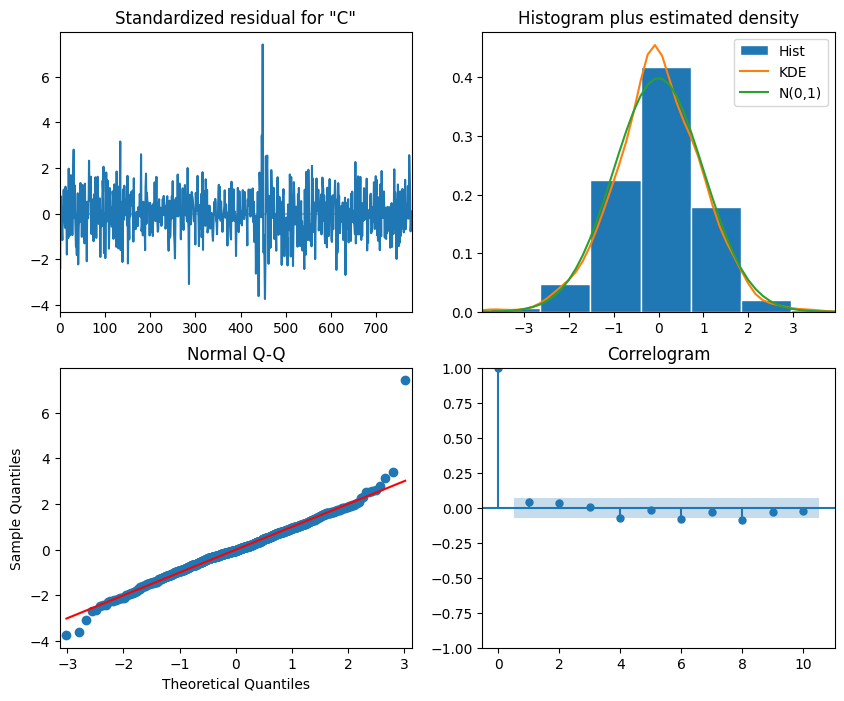

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  780
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 12)   Log Likelihood                3107.758
Date:                            Thu, 29 Jun 2023   AIC                          -6209.516
Time:                                    20:42:21   BIC                          -6195.585
Sample:                                         0   HQIC                         -6204.154
                                            - 780                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9039      0.012     73.819      0.000       0.880       0.928
ar.S.L12      -0.4775      0.027   

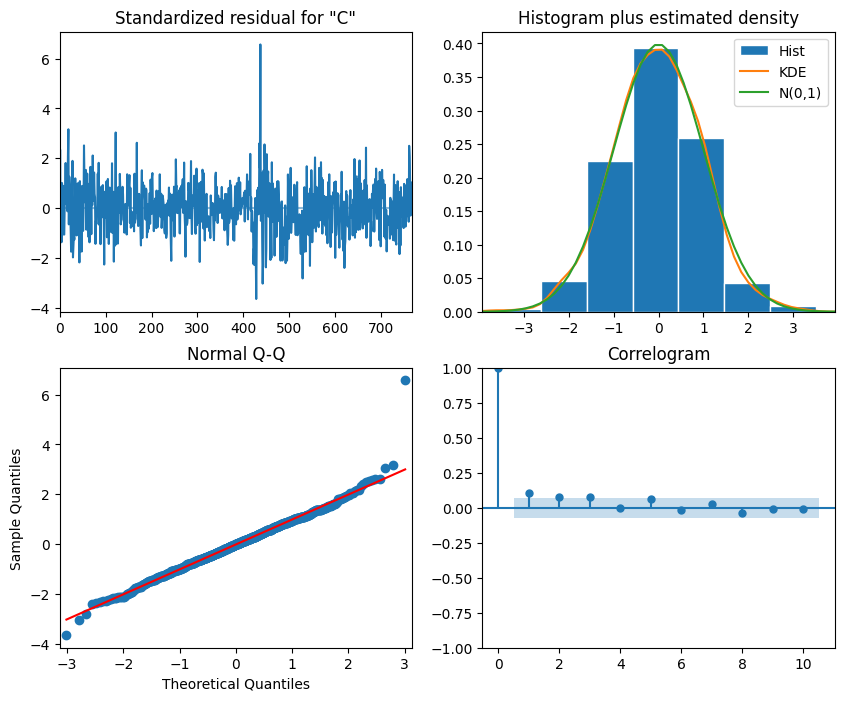

                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  780
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 12)   Log Likelihood                3224.472
Date:                              Thu, 29 Jun 2023   AIC                          -6440.945
Time:                                      20:42:26   BIC                          -6422.370
Sample:                                           0   HQIC                         -6433.795
                                              - 780                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9950      0.005    182.194      0.000       0.984       1.006
ar.S.L12       0.02

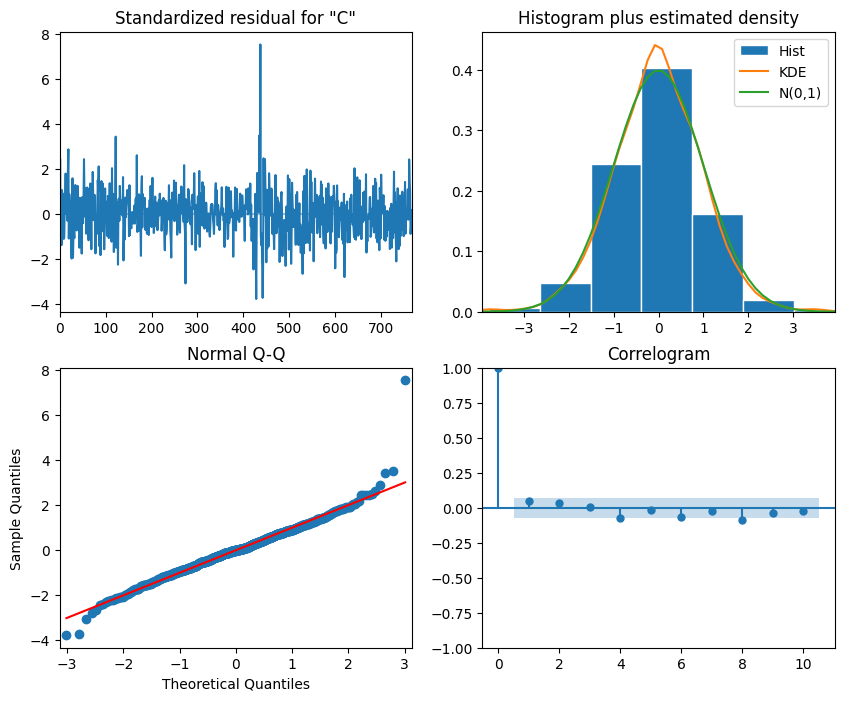

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  780
Model:               SARIMAX(1, 0, 1)   Log Likelihood                3293.455
Date:                Thu, 29 Jun 2023   AIC                          -6580.911
Time:                        20:42:27   BIC                          -6566.933
Sample:                             0   HQIC                         -6575.535
                                - 780                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   2.37e-05   4.22e+04      0.000       1.000       1.000
ma.L1          0.0474      0.034      1.399      0.162      -0.019       0.114
sigma2      1.241e-05   3.81e-07     32.560      0.0

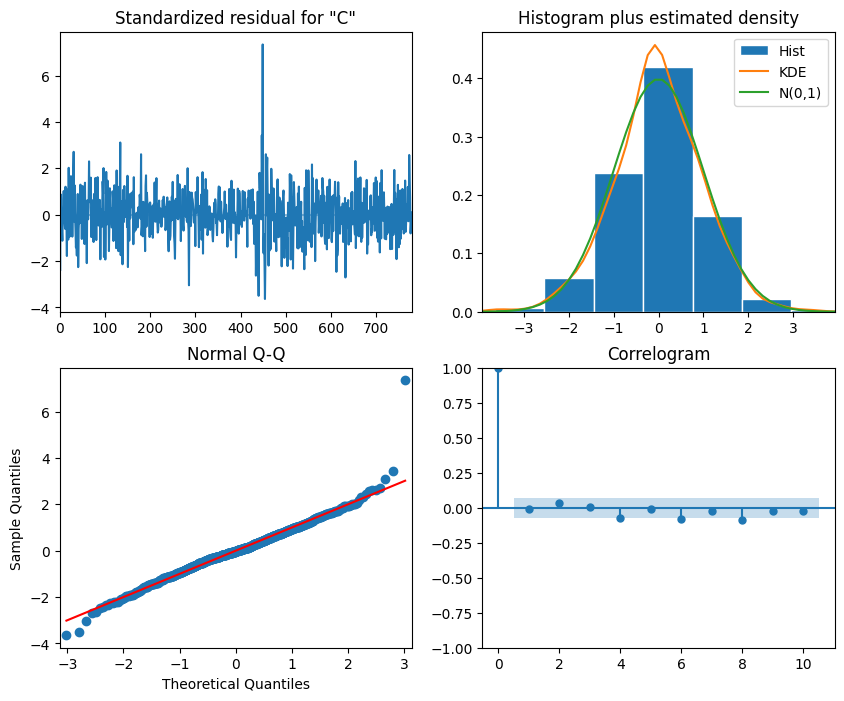

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  780
Model:             SARIMAX(1, 0, 1)x(0, 0, 1, 12)   Log Likelihood                3293.455
Date:                            Thu, 29 Jun 2023   AIC                          -6578.911
Time:                                    20:42:29   BIC                          -6560.274
Sample:                                         0   HQIC                         -6571.743
                                            - 780                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   2.38e-05   4.19e+04      0.000       1.000       1.000
ma.L1          0.0474      0.034   

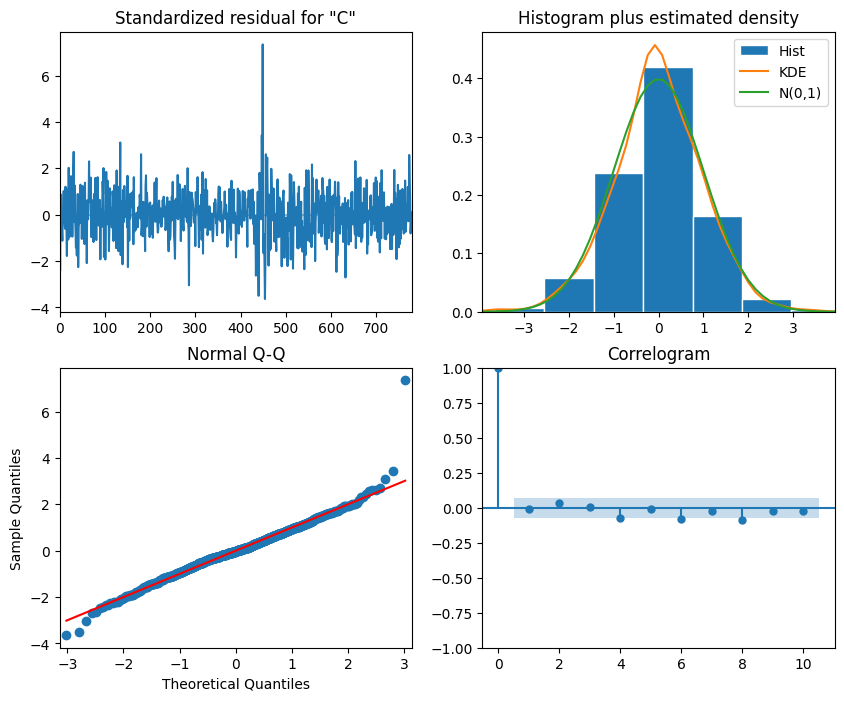

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                  780
Model:             SARIMAX(1, 0, 1)x(0, 1, [], 12)   Log Likelihood                3011.765
Date:                             Thu, 29 Jun 2023   AIC                          -6017.531
Time:                                     20:42:31   BIC                          -6003.599
Sample:                                          0   HQIC                         -6012.169
                                             - 780                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8893      0.015     59.469      0.000       0.860       0.919
ma.L1          0.0851      

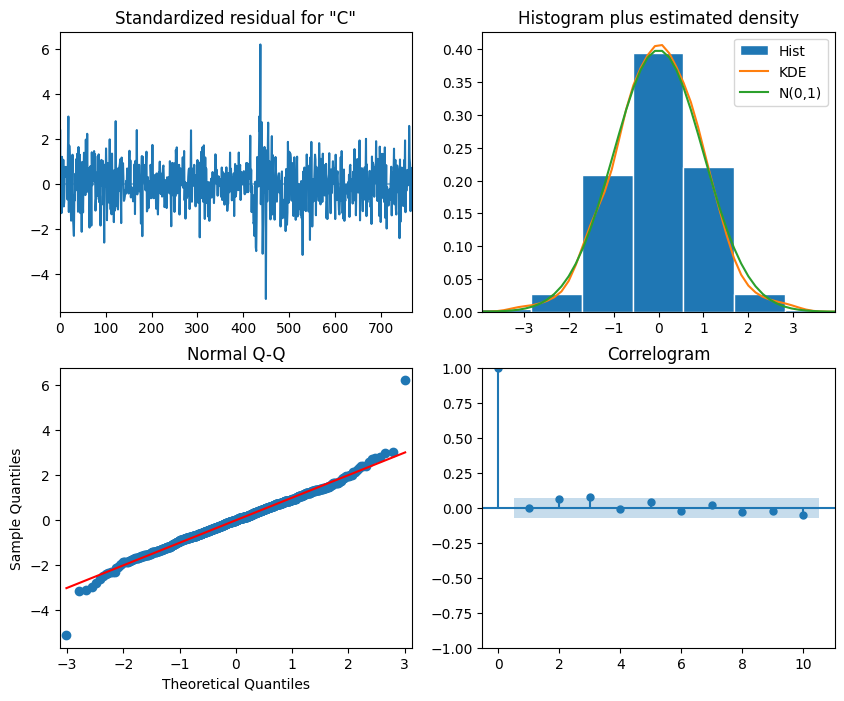

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  780
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                3171.050
Date:                            Thu, 29 Jun 2023   AIC                          -6334.099
Time:                                    20:42:33   BIC                          -6315.524
Sample:                                         0   HQIC                         -6326.950
                                            - 780                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8901      0.012     73.761      0.000       0.866       0.914
ma.L1          0.0805      0.040   

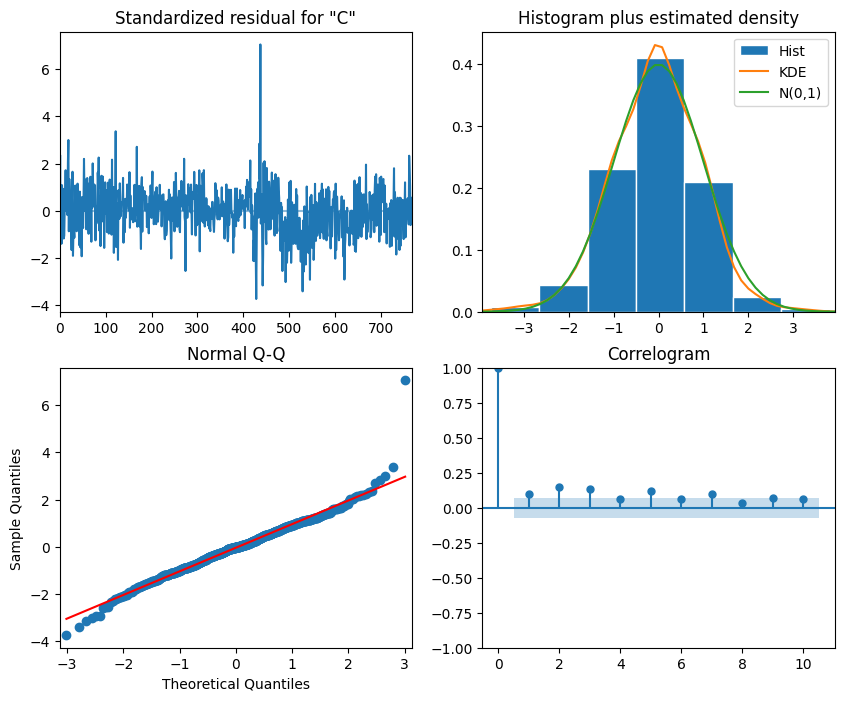

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                  780
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 12)   Log Likelihood                2991.996
Date:                             Thu, 29 Jun 2023   AIC                          -5975.991
Time:                                     20:42:34   BIC                          -5957.354
Sample:                                          0   HQIC                         -5968.823
                                             - 780                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   8.92e-05   1.12e+04      0.000       1.000       1.000
ma.L1          0.0474      

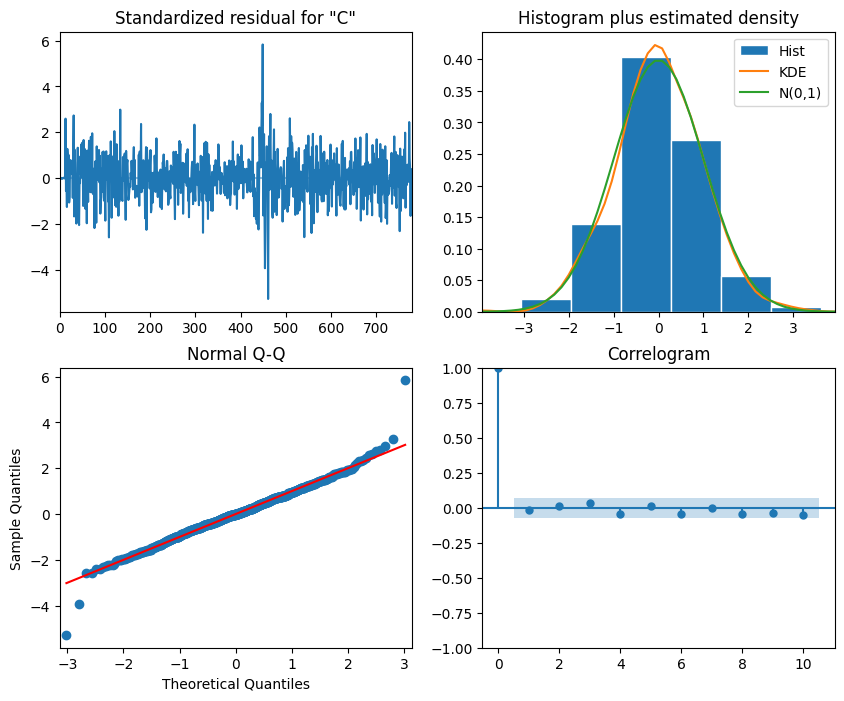

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  780
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                3294.246
Date:                            Thu, 29 Jun 2023   AIC                          -6578.493
Time:                                    20:42:38   BIC                          -6555.196
Sample:                                         0   HQIC                         -6569.533
                                            - 780                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   2328.066      0.000       0.999       1.001
ma.L1          0.0447      0.005   

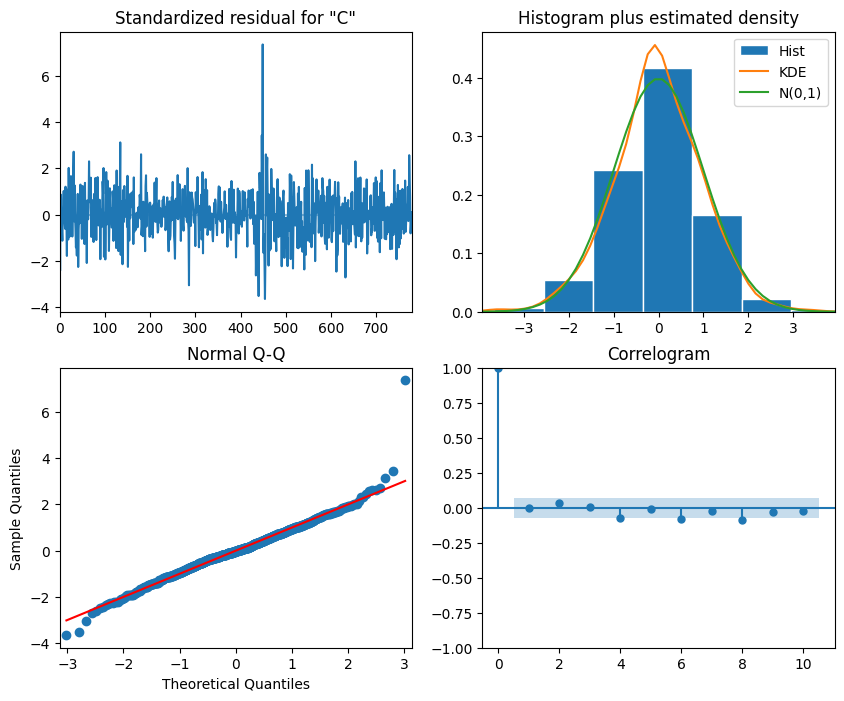

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                  780
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 12)   Log Likelihood                3110.829
Date:                             Thu, 29 Jun 2023   AIC                          -6213.658
Time:                                     20:42:43   BIC                          -6195.083
Sample:                                          0   HQIC                         -6206.508
                                             - 780                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8981      0.014     63.095      0.000       0.870       0.926
ma.L1          0.1115      

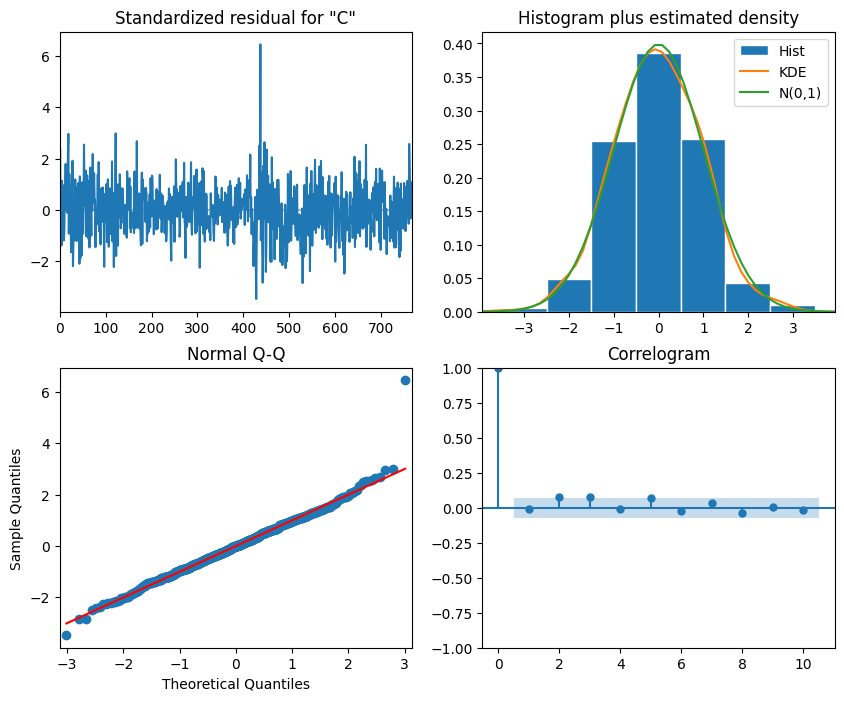

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  780
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                3189.067
Date:                            Thu, 29 Jun 2023   AIC                          -6368.133
Time:                                    20:42:48   BIC                          -6344.915
Sample:                                         0   HQIC                         -6359.197
                                            - 780                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9220      0.010     88.591      0.000       0.902       0.942
ma.L1          0.1420      0.037   

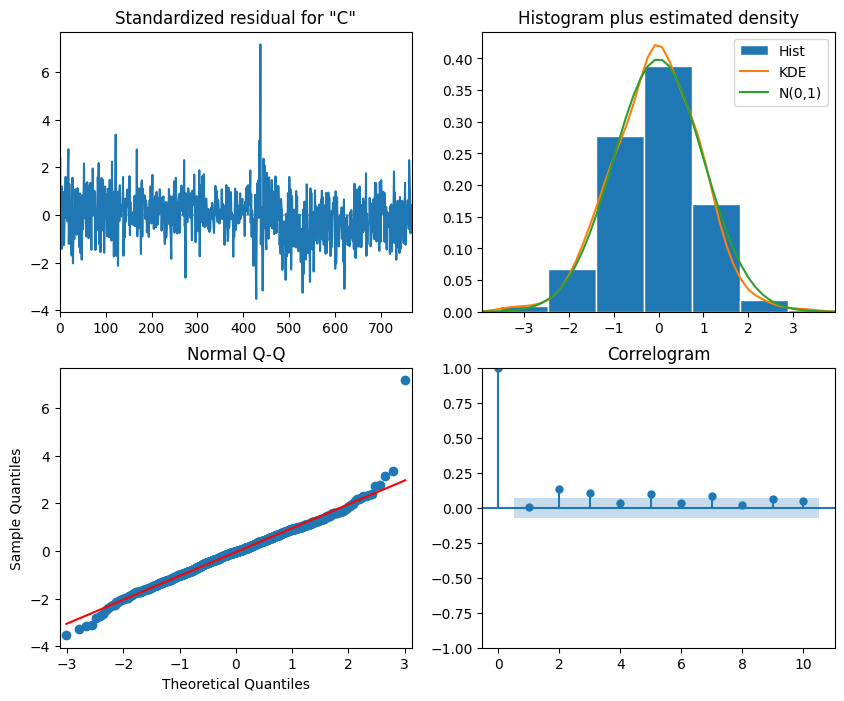

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  780
Model:               SARIMAX(1, 1, 0)   Log Likelihood                3295.629
Date:                Thu, 29 Jun 2023   AIC                          -6587.259
Time:                        20:42:49   BIC                          -6577.943
Sample:                             0   HQIC                         -6583.676
                                - 780                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0460      0.033      1.381      0.167      -0.019       0.111
sigma2      1.236e-05   3.84e-07     32.153      0.000    1.16e-05    1.31e-05
Ljung-Box (L1) (Q):                   0.00   Jarque-

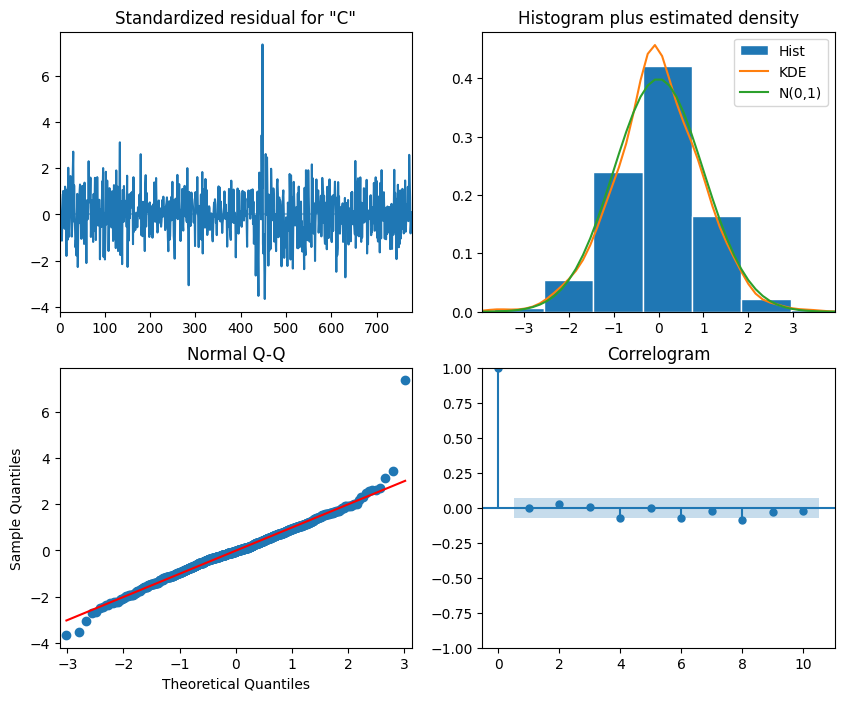

                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  780
Model:             SARIMAX(1, 1, 0)x(0, 0, [1], 12)   Log Likelihood                3295.818
Date:                              Thu, 29 Jun 2023   AIC                          -6585.636
Time:                                      20:42:51   BIC                          -6571.662
Sample:                                           0   HQIC                         -6580.261
                                              - 780                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0460      0.033      1.375      0.169      -0.020       0.111
ma.S.L12       0.02

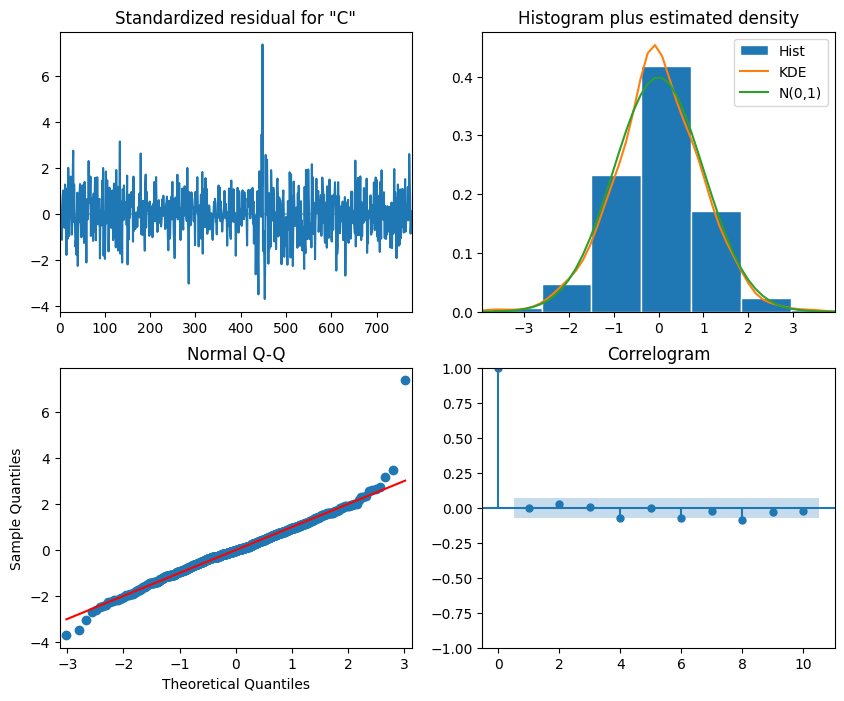

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  780
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                2987.979
Date:                            Thu, 29 Jun 2023   AIC                          -5971.959
Time:                                    20:42:52   BIC                          -5962.674
Sample:                                         0   HQIC                         -5968.385
                                            - 780                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0292      0.033      0.897      0.370      -0.035       0.093
sigma2      2.417e-05   9.11e-07   

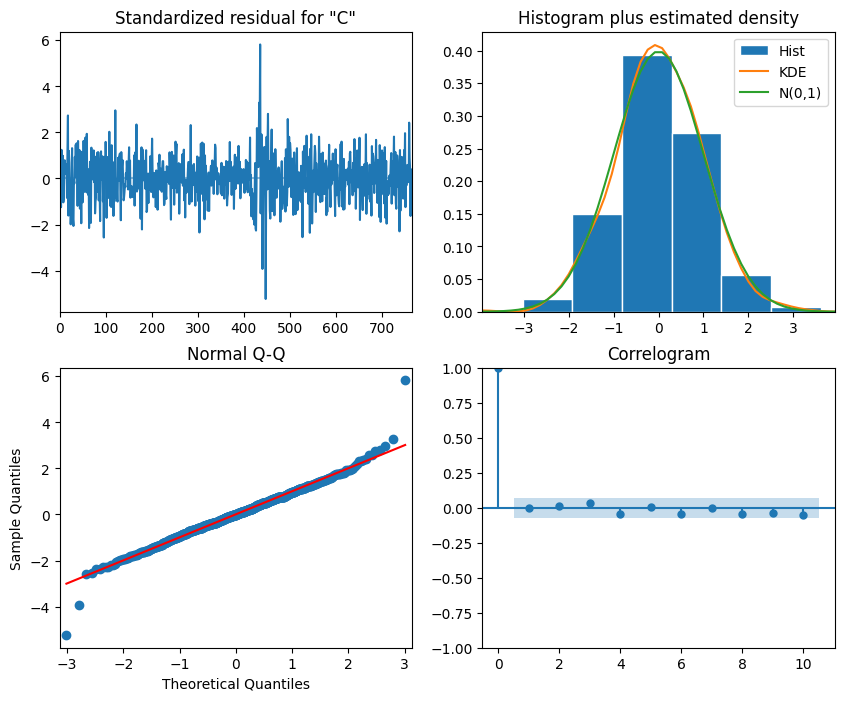

                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  780
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                3180.943
Date:                              Thu, 29 Jun 2023   AIC                          -6355.887
Time:                                      20:42:55   BIC                          -6341.959
Sample:                                           0   HQIC                         -6350.526
                                              - 780                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0292      0.034      0.860      0.390      -0.037       0.096
ma.S.L12      -0.71

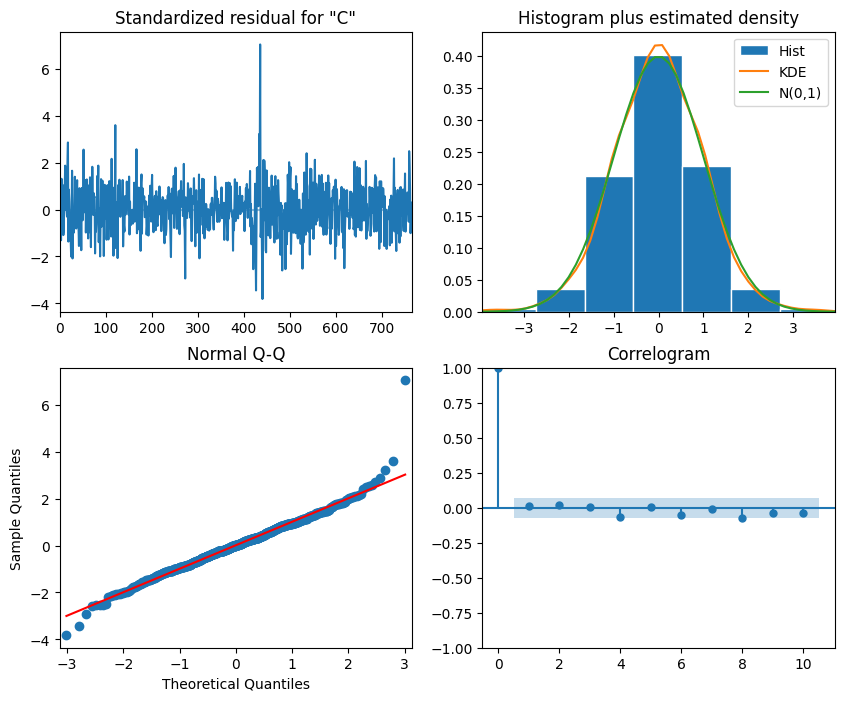

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  780
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 12)   Log Likelihood                3295.845
Date:                            Thu, 29 Jun 2023   AIC                          -6585.690
Time:                                    20:42:57   BIC                          -6571.716
Sample:                                         0   HQIC                         -6580.315
                                            - 780                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0460      0.033      1.374      0.169      -0.020       0.112
ar.S.L12       0.0251      0.037   

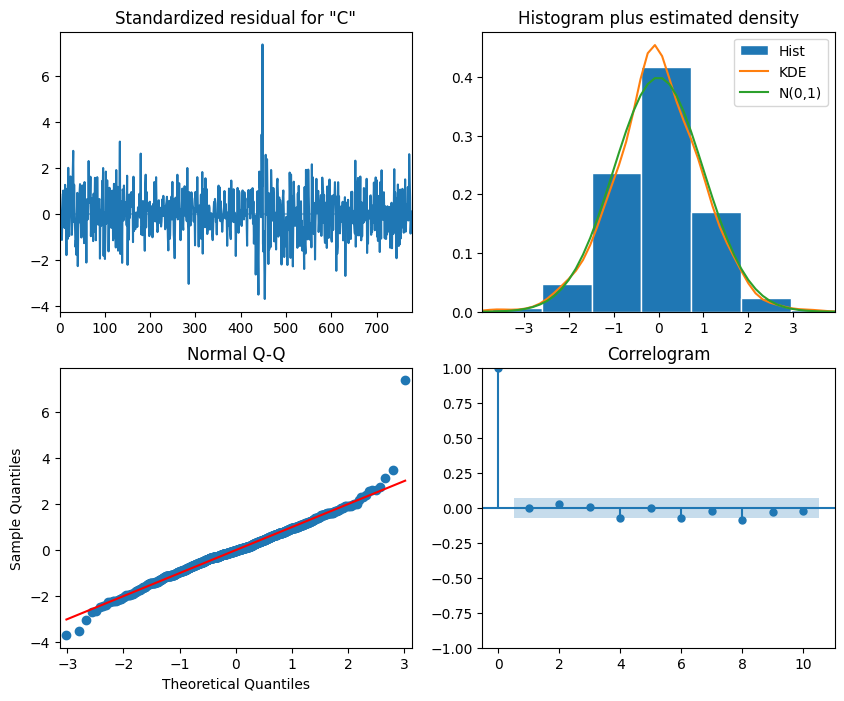

                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  780
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 12)   Log Likelihood                3295.856
Date:                              Thu, 29 Jun 2023   AIC                          -6583.713
Time:                                      20:42:59   BIC                          -6565.081
Sample:                                           0   HQIC                         -6576.546
                                              - 780                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0460      0.033      1.375      0.169      -0.020       0.111
ar.S.L12       0.07

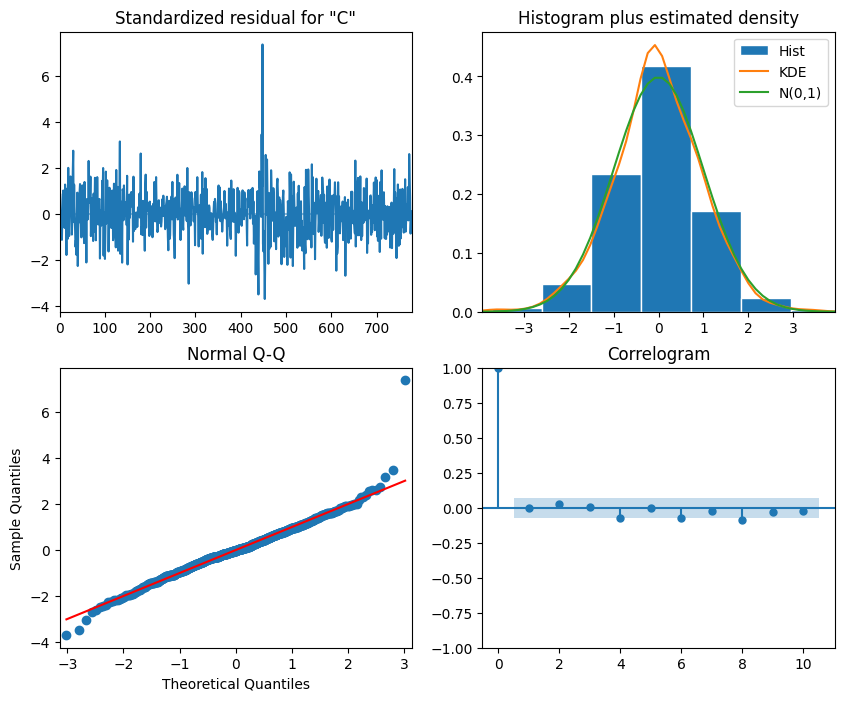

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  780
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                3081.739
Date:                            Thu, 29 Jun 2023   AIC                          -6157.478
Time:                                    20:43:00   BIC                          -6143.550
Sample:                                         0   HQIC                         -6152.117
                                            - 780                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0292      0.044      0.660      0.509      -0.058       0.116
ar.S.L12      -0.4951      0.034   

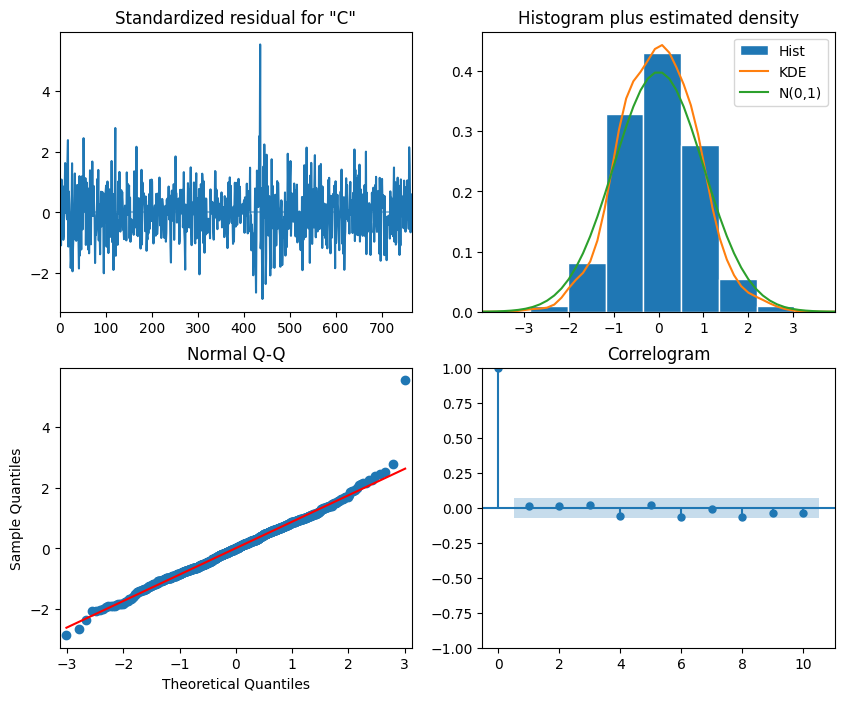

                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  780
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood                3187.244
Date:                              Thu, 29 Jun 2023   AIC                          -6366.488
Time:                                      20:43:09   BIC                          -6347.918
Sample:                                           0   HQIC                         -6359.340
                                              - 780                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0503      0.034      1.475      0.140      -0.017       0.117
ar.S.L12      -0.14

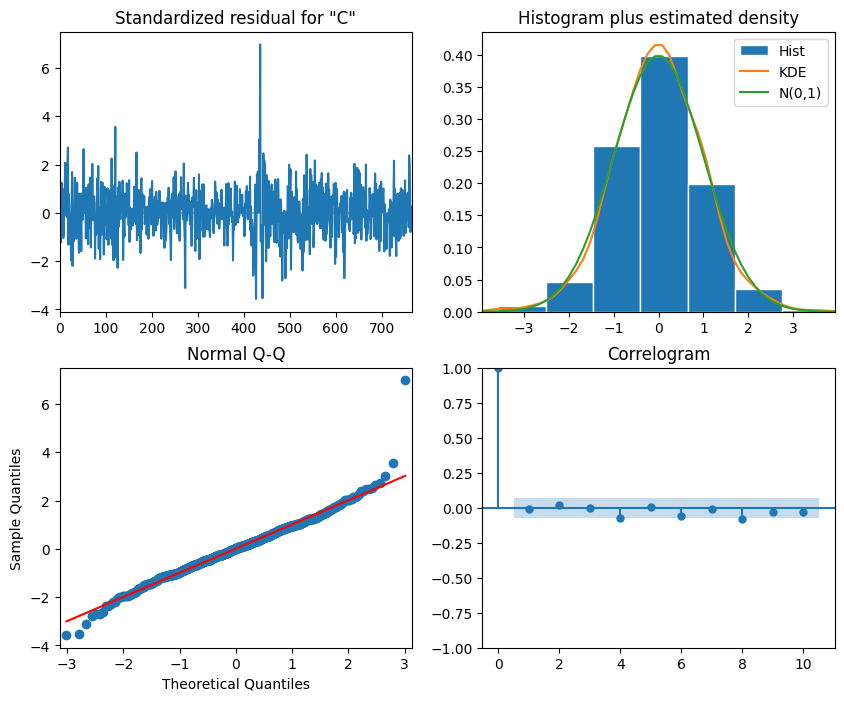

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  780
Model:               SARIMAX(1, 1, 1)   Log Likelihood                3295.600
Date:                Thu, 29 Jun 2023   AIC                          -6585.201
Time:                        20:43:10   BIC                          -6571.227
Sample:                             0   HQIC                         -6579.826
                                - 780                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4719      0.450      1.048      0.295      -0.411       1.355
ma.L1         -0.4241      0.468     -0.907      0.365      -1.341       0.493
sigma2      1.235e-05   4.17e-07     29.597      0.0

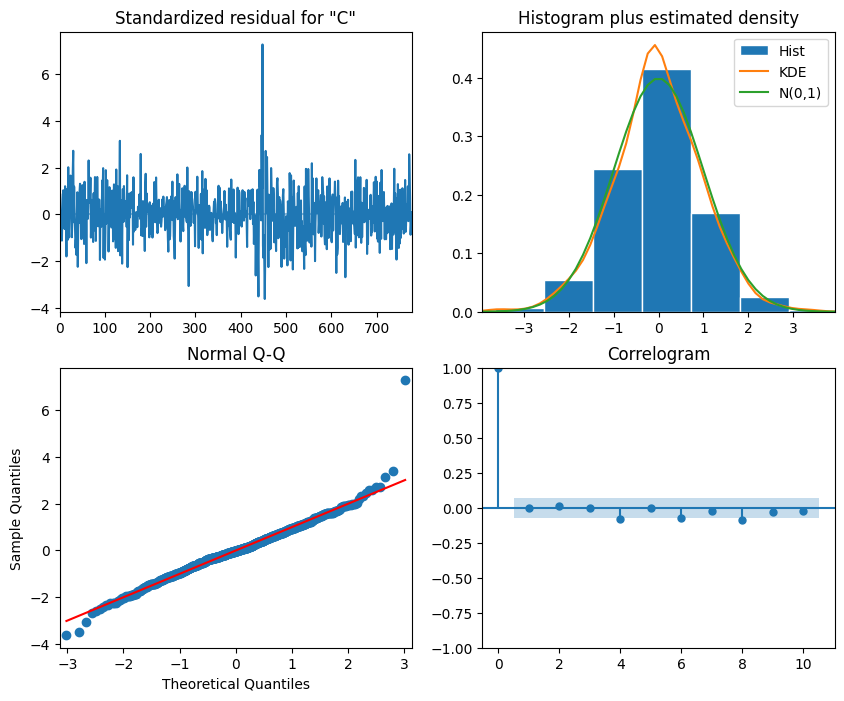

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  780
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood                3295.794
Date:                            Thu, 29 Jun 2023   AIC                          -6583.587
Time:                                    20:43:12   BIC                          -6564.955
Sample:                                         0   HQIC                         -6576.421
                                            - 780                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4719      0.455      1.037      0.300      -0.420       1.364
ma.L1         -0.4241      0.472   

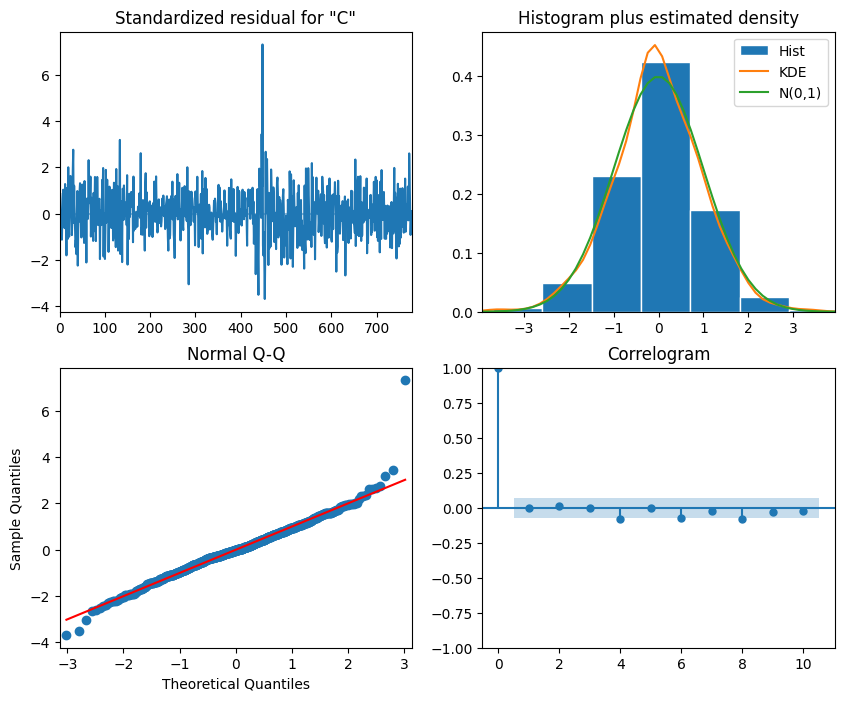

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                  780
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                2986.689
Date:                             Thu, 29 Jun 2023   AIC                          -5967.378
Time:                                     20:43:13   BIC                          -5953.450
Sample:                                          0   HQIC                         -5962.017
                                             - 780                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7936      0.241      3.290      0.001       0.321       1.266
ma.L1         -0.7634      

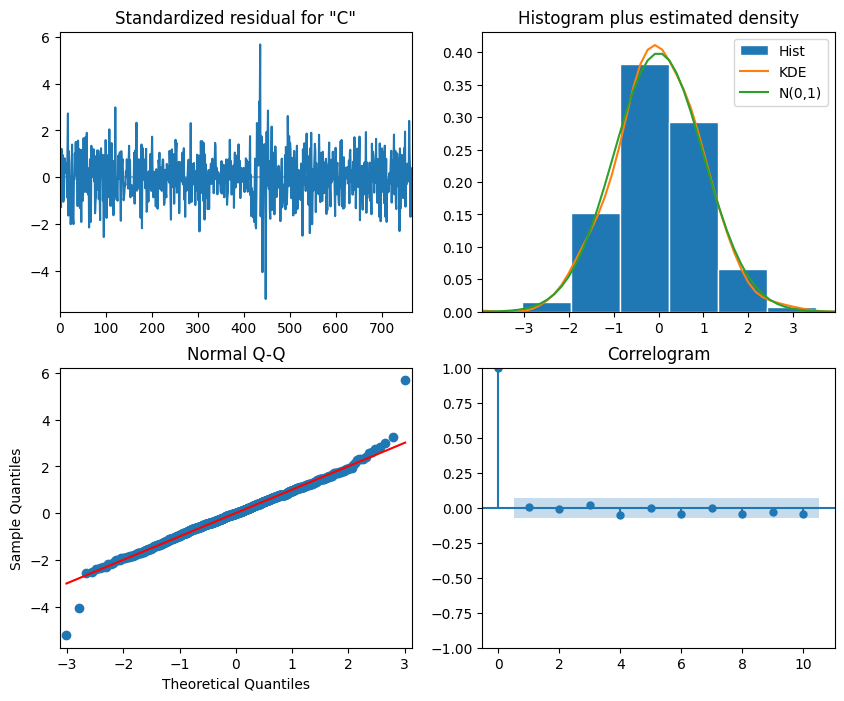

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  780
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                3179.349
Date:                            Thu, 29 Jun 2023   AIC                          -6350.697
Time:                                    20:43:19   BIC                          -6332.127
Sample:                                         0   HQIC                         -6343.549
                                            - 780                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7936      0.243      3.267      0.001       0.317       1.270
ma.L1         -0.7634      0.254   

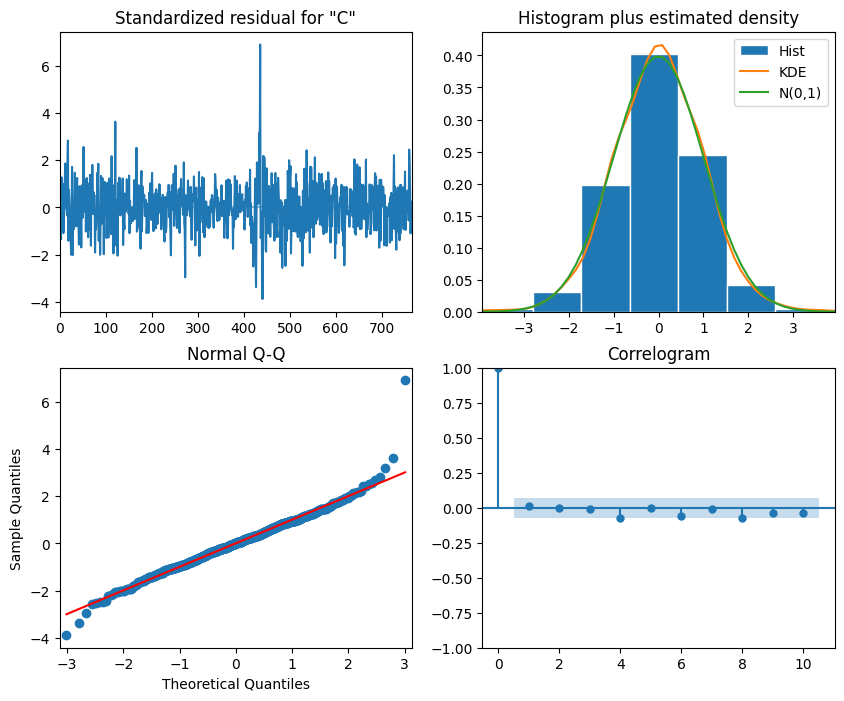

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                  780
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood                3295.820
Date:                             Thu, 29 Jun 2023   AIC                          -6583.640
Time:                                     20:43:21   BIC                          -6565.008
Sample:                                          0   HQIC                         -6576.473
                                             - 780                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4719      0.455      1.037      0.300      -0.420       1.364
ma.L1         -0.4241      

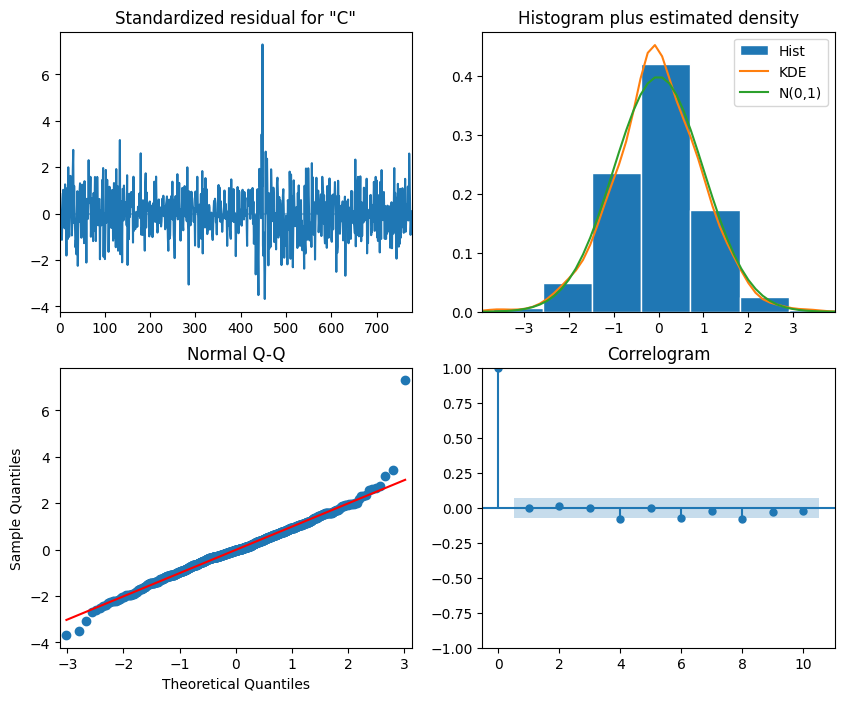

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  780
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                3295.861
Date:                            Thu, 29 Jun 2023   AIC                          -6581.723
Time:                                    20:43:25   BIC                          -6558.433
Sample:                                         0   HQIC                         -6572.764
                                            - 780                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4690      0.513      0.914      0.361      -0.537       1.475
ma.L1         -0.4265      0.530   

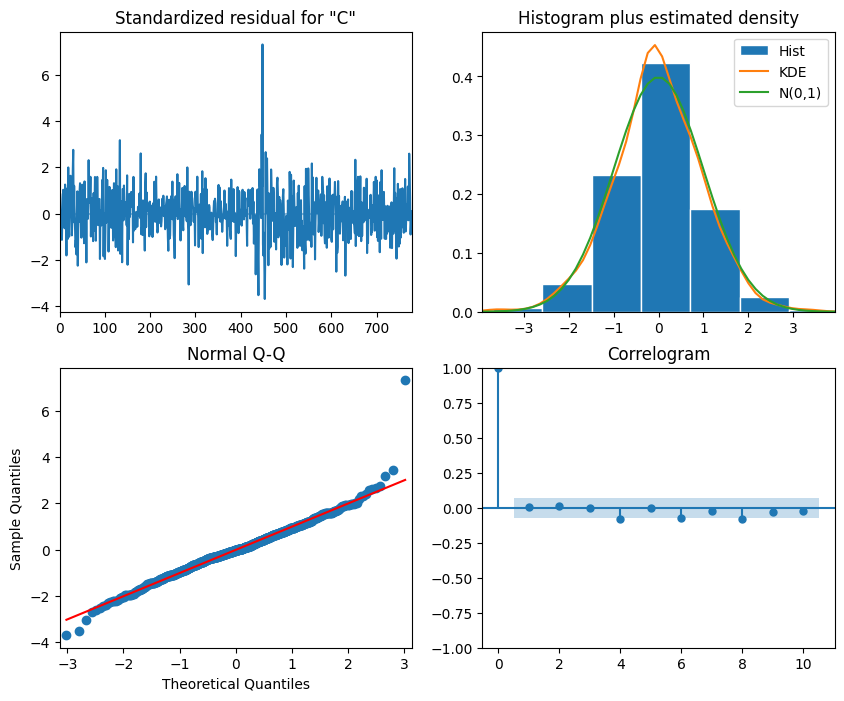

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                  780
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                3093.738
Date:                             Thu, 29 Jun 2023   AIC                          -6179.477
Time:                                     20:43:27   BIC                          -6160.907
Sample:                                          0   HQIC                         -6172.329
                                             - 780                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7936      0.264      3.007      0.003       0.276       1.311
ma.L1         -0.7634      

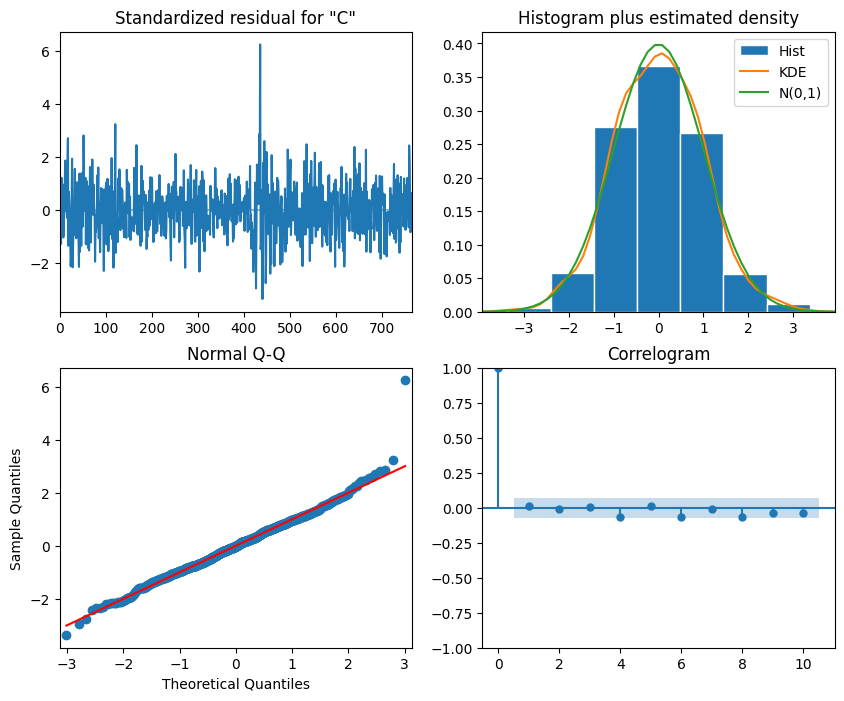

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  780
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                3178.257
Date:                            Thu, 29 Jun 2023   AIC                          -6346.515
Time:                                    20:43:30   BIC                          -6323.302
Sample:                                         0   HQIC                         -6337.580
                                            - 780                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7844      0.670      1.171      0.242      -0.529       2.098
ma.L1         -0.7727      0.682   

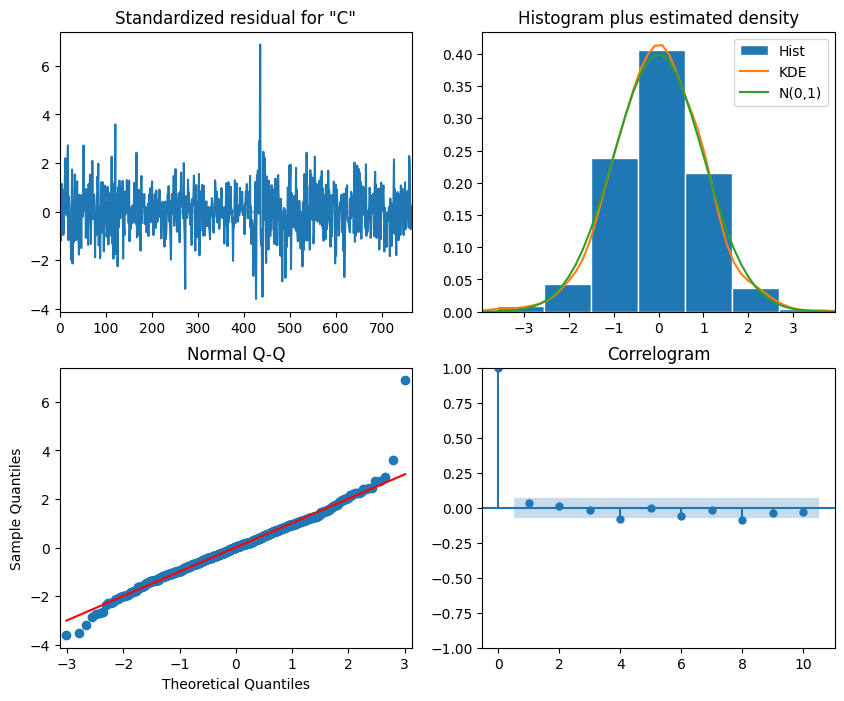

Best Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  780
Model:               SARIMAX(0, 1, 0)   Log Likelihood                3294.801
Date:                Thu, 29 Jun 2023   AIC                          -6587.601
Time:                        20:43:31   BIC                          -6582.943
Sample:                             0   HQIC                         -6585.810
                                - 780                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       1.24e-05   3.64e-07     34.095      0.000    1.17e-05    1.31e-05
Ljung-Box (L1) (Q):                   1.65   Jarque-Bera (JB):               533.52
Prob(Q):                   

In [ ]:
# Define a function for SARIMA model fitting and diagnostics
def fit_sarima(order, seasonal_order):
    model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    print(model_fit.summary())
    model_fit.plot_diagnostics(figsize=(10, 8))
    plt.show()

# Specify different combinations of parameters to evaluate
p = d = q = range(0, 2)  # Consider AR, I, and MA components in the range [0, 1]
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]  # Consider seasonal components with period 12 (months)

# Iterate over combinations and fit SARIMA models
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            fit_sarima(param, param_seasonal)
        except:
            continue

# Print the best model's summary
print("Best Model Summary:")
print(best_model.summary())

The system choose SARIMAX(0, 1, 0) with no seasonality seasonal_order(0,0,0,0) that may not be suitable. The foreign exchange market is influenced by various factors that can exhibit seasonal patterns or periodic behavior. In forex markets, there are often recurring patterns based on factors such as economic cycles, interest rate changes, geopolitical events, and trading activity during specific times of the day or week. These patterns can create seasonality in the data. By not considering the seasonal component in the SARIMAX model (setting seasonal_order to (0, 0, 0, 0)), you might overlook valuable information and potentially miss capturing important patterns that could improve your predictions.

Instead I choose:
- Model:  SARIMAX(0, 1, 0)x(0, 0, [1], 12)  
- Likelihood    3295.019
- AIC          -6586.037
- BIC          -6576.721

(0, 0, [1], 12) includes a seasonal MA component, whereas (0, 0, 0, 0) or no seasonality indicates the absence of any seasonal component. The presence or absence of a seasonal component can have an impact on the model's ability to capture and forecast seasonal patterns in the data.
                                     

In [ ]:
# Set the optimal parameters based on diagnostics and summary statistics
order = (0, 1, 0)
seasonal_order = (0, 0, [1], 12)
# Fit the SARIMA model with the optimal parameters to the training data
model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  780
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 12)   Log Likelihood                3295.019
Date:                              Thu, 29 Jun 2023   AIC                          -6586.037
Time:                                      20:43:31   BIC                          -6576.721
Sample:                                           0   HQIC                         -6582.454
                                              - 780                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12       0.0297      0.036      0.818      0.413      -0.041       0.101
sigma2      1.238e-

Model Specification:

The model used is SARIMAX(0, 1, 0)x(0, 0, [1], 12), indicating a non-seasonal difference of order 1 and a seasonal MA component of order 1 with a seasonal period of 12.
Log Likelihood:

The log likelihood value is 3295.019. The higher the log likelihood, the better the model fits the data. In this case, a higher log likelihood suggests a better fit.
Information Criteria:

AIC (Akaike Information Criterion) is -6586.037. AIC is a measure of the model's goodness of fit, penalizing complexity. Lower AIC values indicate a better trade-off between goodness of fit and model complexity.
BIC (Bayesian Information Criterion) is -6576.721. BIC is similar to AIC but penalizes model complexity more strongly. Lower BIC values indicate a better trade-off between goodness of fit and model complexity.
Coefficients:

The coefficient for the seasonal MA component (ma.S.L12) is 0.0297. It indicates the impact of the seasonal moving average component on the model. In this case, it is positive but statistically insignificant (P>|z| = 0.413).
Sigma2 (Variance):

The estimated variance (sigma2) is 1.238e-05. It represents the variance of the error term in the model.
Ljung-Box (Q) and Jarque-Bera (JB) Tests:

The Ljung-Box test checks for the presence of autocorrelation in the residuals. In this case, the test statistic (L1) is 1.58, indicating no significant autocorrelation at lag 1 (Prob(Q) = 0.21).
The Jarque-Bera test assesses the normality assumption of the residuals. The test statistic (JB) is 550.09, suggesting a departure from normality (Prob(JB) = 0.00).
Heteroskedasticity:

The Heteroskedasticity test (H) assesses whether the error term exhibits heteroskedasticity (unequal variances). In this case, the test statistic (H) is 0.97, indicating no strong evidence of heteroskedasticity (Prob(H) = 0.83).

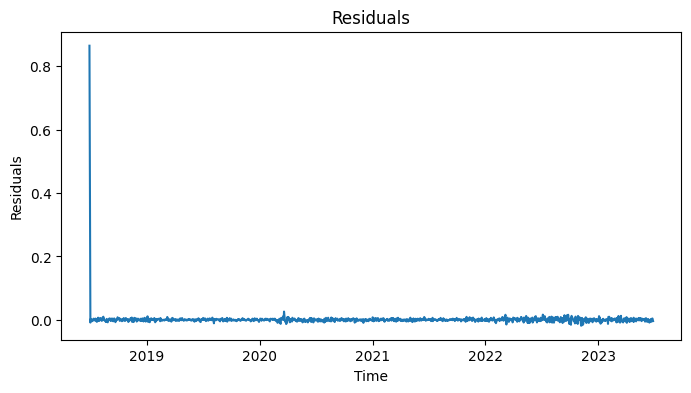

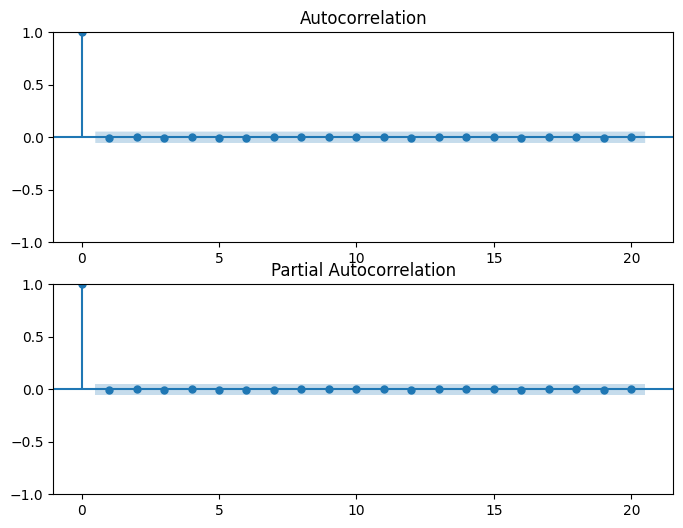

Ljung-Box Q-statistic: lb_stat
Ljung-Box p-values: lb_pvalue


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Fit the SARIMAX model
model = SARIMAX(data['Close'], order=(0, 1, 0), seasonal_order=(0, 0, [1], 12))
results = model.fit()

# obtain the predicted values by calling the "predict method" of the model. These predicted values represent the model's estimation of the Close prices.
predicted_values = results.predict(start=0, end=len(data)-1)

# Residuals represent the differences between the observed and predicted values.
residuals = data['Close'] - predicted_values

# Residual Analysis visually assess the randomness of the residuals.
# Ideally, we want to see no systematic patterns or trends in the residuals, indicating that the model captures the underlying patterns in the data.
plt.figure(figsize=(8, 4))
plt.plot(residuals)
plt.title('Residuals')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

# Autocorrelation Function (ACF), shows the correlation of the residuals with their lagged values
# Partial Autocorrelation Function (PACF) shows the partial correlation after removing the correlation explained by previous lags
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
plot_acf(residuals, ax=ax1, lags=20)
plot_pacf(residuals, ax=ax2, lags=20)
plt.show()

# Ljung-Box test, evaluates whether the residuals are independently distributed.
lbvalue, pvalue = acorr_ljungbox(residuals, lags=30)
print(f"Ljung-Box Q-statistic: {lbvalue}")
print(f"Ljung-Box p-values: {pvalue}")

In the residuals plot, look for any patterns or trends that might indicate remaining systematic behavior in the data. Ideally, the residuals should appear random with no clear structure.

In the ACF and PACF plots, look for significant autocorrelation at different lags. If there are significant spikes outside the confidence intervals, it suggests the presence of autocorrelation.

Examine the Ljung-Box test results. A lower p-value indicates stronger evidence of autocorrelation. Therefore, a model with lower autocorrelation in the residuals, as indicated by the plots and test results, would generally be considered better.

In [ ]:
# Create and fit the SARIMAX model
model = SARIMAX(data['Close'], order=(0, 1, 0), seasonal_order=(0, 0, [1], 12))
results = model.fit()

In [ ]:
forcast = results.get_prediction(start = pd.to_datetime('2018-07-02'), dynamic = False)
predictions = forcast.predicted_mean

actual = test['2021-06-29':]

rmse = np.sqrt((predictions - actual)**2).mean()
print('The Root Mean Squared error of our forecast is {}'.format(round(rmse,2)))

The Root Mean Squared error of our forecast is 0.0


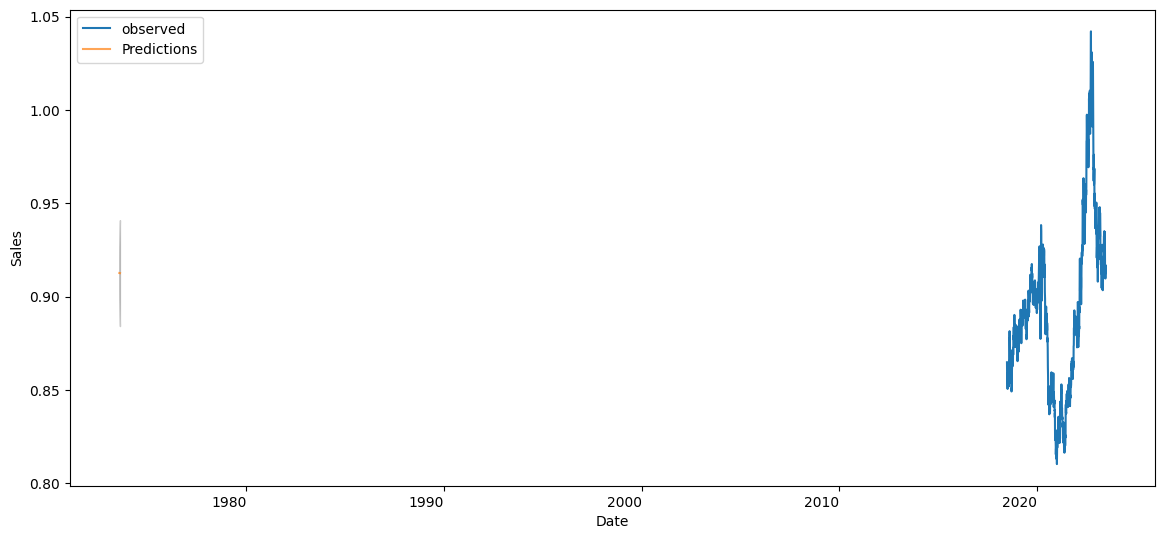

In [ ]:
forecast = results.get_forecast(steps=12)

# predictions and confidence interval
predictions= forecast.predicted_mean
ci = forecast.conf_int()

# observed plot
fig = data['Close'].plot(label = 'observed', figsize = (14,7))
fig.set_xlabel('Date')
fig.set_ylabel('Sales')
fig.fill_between(ci.index,
                ci.iloc[:,0],
                ci.iloc[:,1], color = 'k', alpha=.2)

# prediction plot
predictions.plot(ax=fig, label='Predictions', alpha=.7, figsize=(14,7))

plt.legend()
plt.show()

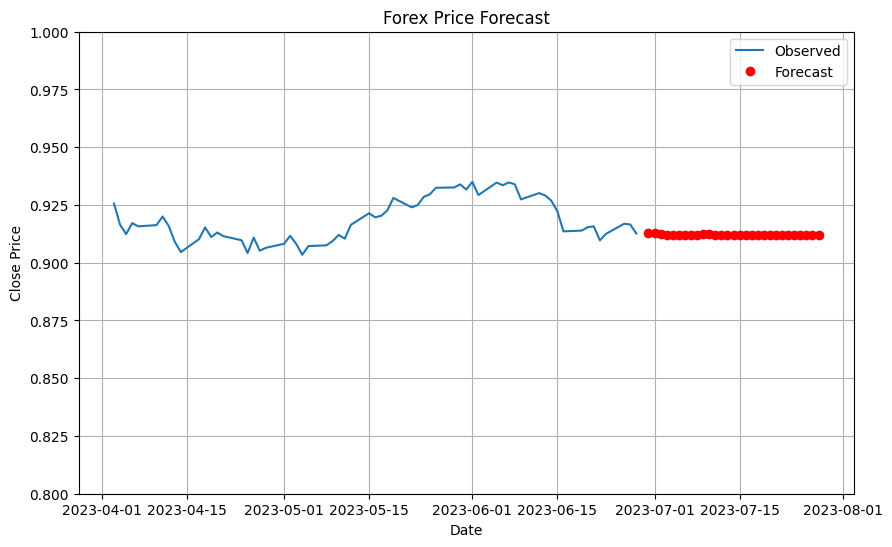

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming you have a DataFrame called 'data' with 'Close' column and the date is the index

# Filter data for the desired range
start_date = pd.to_datetime('2023-04-01')
end_date = pd.to_datetime('2023-06-29')
filtered_data = data.loc[start_date:end_date]

# Create and fit SARIMAX model
model = SARIMAX(filtered_data['Close'], order=(1, 1, 0), seasonal_order=(0, 0, [1], 12))
results = model.fit()

# Get forecast for next month (July 2023)
forecast_start = end_date + pd.DateOffset(days=1)
forecast_end = end_date + pd.DateOffset(months=1)
forecast = results.get_forecast(steps=(forecast_end - forecast_start).days)
forecast_mean = forecast.predicted_mean

# Plot the observed and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(filtered_data.index, filtered_data['Close'], label='Observed')
plt.plot(pd.date_range(forecast_start, forecast_end - pd.DateOffset(days=1), freq='D'), forecast_mean, 'ro', label='Forecast')
plt.title('Forex Price Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.ylim(0.8, 1)  # Set the y-axis limits to the desired range
plt.legend()
plt.grid(True)
plt.show()


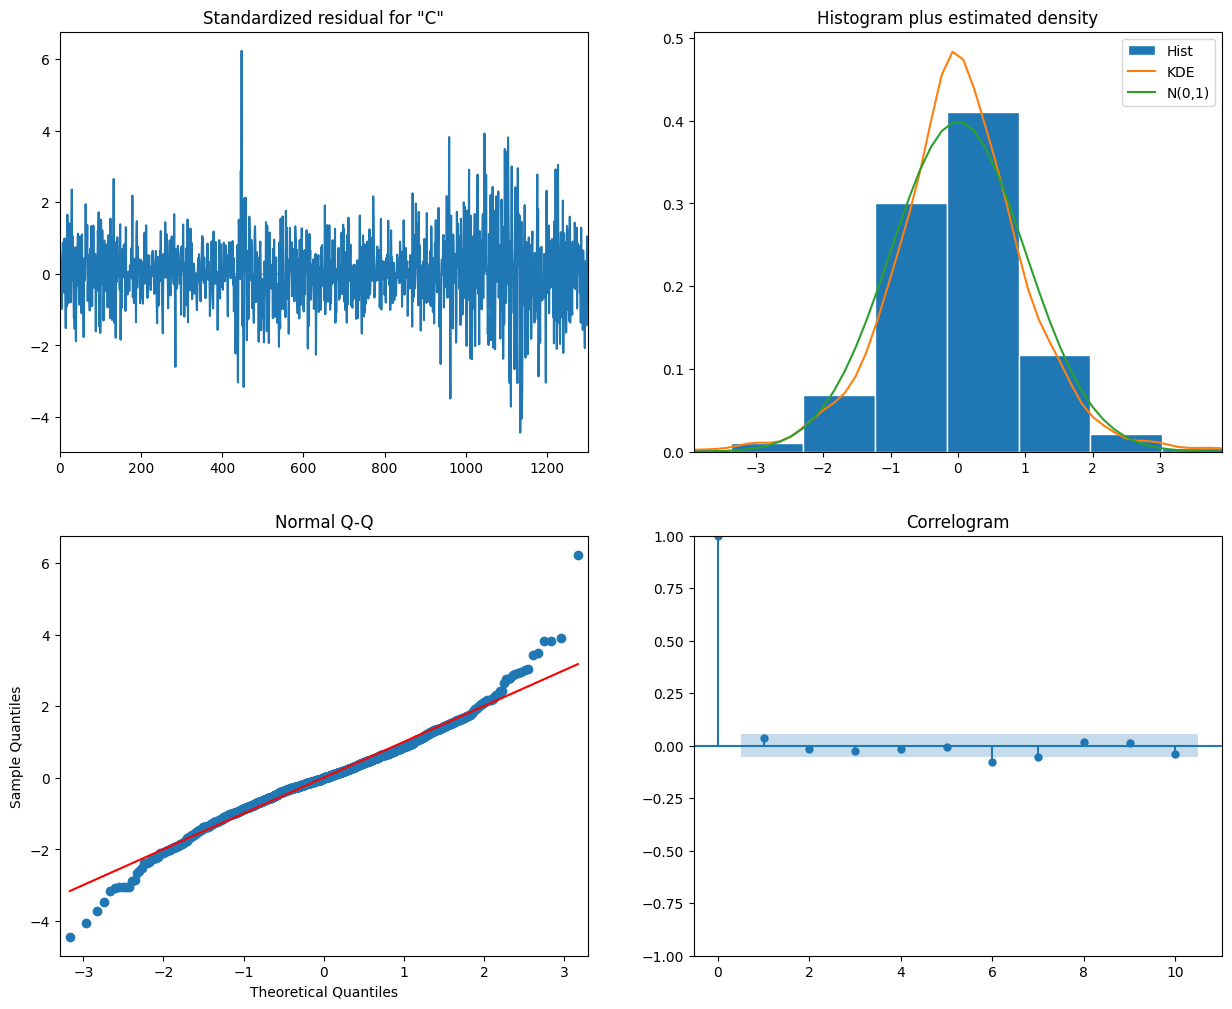

In [ ]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
2018-06-29